# Cosmological perturbations
---

This notebook aims to numerically solve linear cosmological perturbations, for some DE fluids

Author: ```Vicente Pedreros A.```

---


EFE in Conformal Newtonian Gauge:
\begin{align}
    k^2 \Phi + 3 aH \left( \Phi' + aH \Psi \right) &= -4\pi G a^2 \delta \rho, \\
    k^2 \left( \Phi' + aH \Psi \right) &= 4\pi G a^2 (\bar{\rho} + \bar{P}) \theta, \\
    \Phi'' + aH (\Psi' + 2 \Phi') + (3a^2H^2+2aH') \Psi + \frac{k^2}{3} (\Phi - \Psi) &= 12\pi G a^2 \delta P, \\
    k^2 (\Phi - \Psi) &= 12 \pi G a^2 (\bar{\rho} + \bar{P}) \sigma.
\end{align}

Now considering no anisotropic stress:
\begin{align}
    k^2 \Phi + 3 aH \left( \Phi' + aH \Phi \right) &= -4\pi G a^2 \delta \rho, \\
    k^2 \left( \Phi' + aH \Phi \right) &= 4\pi G a^2 (\bar{\rho} + \bar{P}) \theta, \\
    \Phi'' + 3aH\Phi' + (3a^2H^2+2aH') \Phi&= 12\pi G a^2 \delta P, \\
    \Phi &=\Psi .
\end{align}


The perturbation equations are

$$\dot{\delta}=-(1+w)(\theta-3\dot{\phi}) - 3 \mathcal{H}\left(\frac{\delta P}{\bar{\rho}} - w\delta \right),$$

$$\dot{\theta} = -\mathcal{H}(1-3w)\theta - \frac{\dot{w}}{1+w} \theta + \frac{1}{1+w}\frac{k^2\delta P}{\bar{\rho}} - k^2\sigma + k^2\psi.$$

Now, replacing the values given and the restriction $\psi=\phi$ from the $i-j$ traceless component of the perturbed Einstein field equations, we get perturbations for a pressureless matter component:

$$ \dot{\delta} = -\theta + 3\dot{\phi},$$
$$ \dot{\theta} = -\mathcal{H}\theta + k^2\phi.$$

But we need an expression for the potential, which in general can be obtained from the 0-0 and $i-0$ components of the perturbed Einstein field equations, which is:

$$k^2\phi = -4\pi G a^2\left[ \delta\rho + \frac{3\mathcal{H}}{k^2}(1+w)\bar{\rho}\theta\right].$$

For late time dynamics, we consider two components:
$$k^2\phi = -4\pi G a^2\left[ \delta\rho_m + + \delta\rho_{DE} + \frac{3\mathcal{H}}{k^2}\left((1+w_m)\bar{\rho}_m\theta_m + (1+w_\text{DE})\bar{\rho}_\text{DE}\theta_\text{DE} \right)\right],$$

Since we are interested in working with dimensionless quantities ($\delta$ rather than $\delta\rho$), we recall the definition of the density parameters in terms of the average density $\bar{\rho}$:

$$\Omega_a \equiv \frac{8\pi G}{3H^2}\bar{\rho}_a.$$
Hence, the Poisson equation that we use is:

$$k^2\phi = -\frac{3(aH)^2}{2}\left[\Omega_m\left(\delta_m + \frac{3aH}{k^2}\theta_m\right) +\Omega_\text{DE}\left(\delta_\text{DE} + \frac{3aH}{k^2}(1+w_\text{DE})\theta_\text{DE}\right)\right]$$

Finally, converting the derivatives to derivatives on the scale factor, via $\frac{d}{d\tau} = a\mathcal{H}\frac{d}{da} = a^2H \frac{d}{da}$, replacing $\mathcal{H} = a H$ and using $3a^2H^2 = 8\pi G a^2 \bar{\rho}$, we get the following system of equations

$$\delta_m' = -\frac{\theta_m}{a^2 H} + 3\phi'$$
$$\theta_m' = -\frac{\theta_m}{a} + \frac{k^2\phi}{a^2H}$$
$$\delta_\text{DE}' = -(1+w_\text{DE})\left(\frac{\theta_\text{DE}}{a^2H}-3\phi'\right)-\frac{3}{a}\left(c_s^2-w_\text{DE}\right)\delta_\text{DE}$$

$$\theta_\text{DE}' = -\frac{1}{a}\left(1-3w_\text{DE}\right)\theta_\text{DE}-\frac{w'_\text{DE}}{1+w_\text{DE}}\theta_\text{DE}+\frac{k^2}{a^2H}\left[\frac{c_s^2}{1+w_\text{DE}}\delta_\text{DE}+\phi\right]$$

$$k^2\phi = -\frac{3(aH)^2}{2}\left[\Omega_m\left(\delta_m + \frac{3aH}{k^2}\theta_m\right) +\Omega_\text{DE} \left(\delta_\text{DE} + \frac{3aH}{k^2}(1+w_\text{DE})\theta_\text{DE}\right) \right]$$

$$\phi'=\frac{3H}{2k^2}\left[\Omega_m\theta_m + \Omega_\text{DE}(1+w_\text{DE})\theta_\text{DE}\right]-\frac{\phi}{a}$$


In [1]:
import numpy as np
from astropy import constants as const
import matplotlib.pyplot as plt
import scienceplots
from classy import Class
from scipy.integrate import solve_ivp
import perturbations as vp_pt
import pert_onlymatter as pert_m

plt.style.use(['science', 'bright'])
plt.rcParams.update({
    # Figure
    'figure.figsize': (6.8, 4.2),
    'figure.dpi': 200,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,

    # Lines and markers
    'lines.linewidth': 1.5,
    'lines.markersize': 5,

    # Font
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,

    # Axes
    'axes.linewidth': 1.0,
    'axes.grid': True,
    'grid.alpha': 0.3,

    # Ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,

    # Legend
    'legend.frameon': False,

    # Text rendering (LaTeX)
    'text.usetex': True,               # Optional: needs LaTeX installed
    'text.latex.preamble': r'\usepackage{amsmath,amssymb}',  # Optional
})

# Only matter Universe

## Some visualizations

In [2]:
pars = pert_m.cosmo_parameters

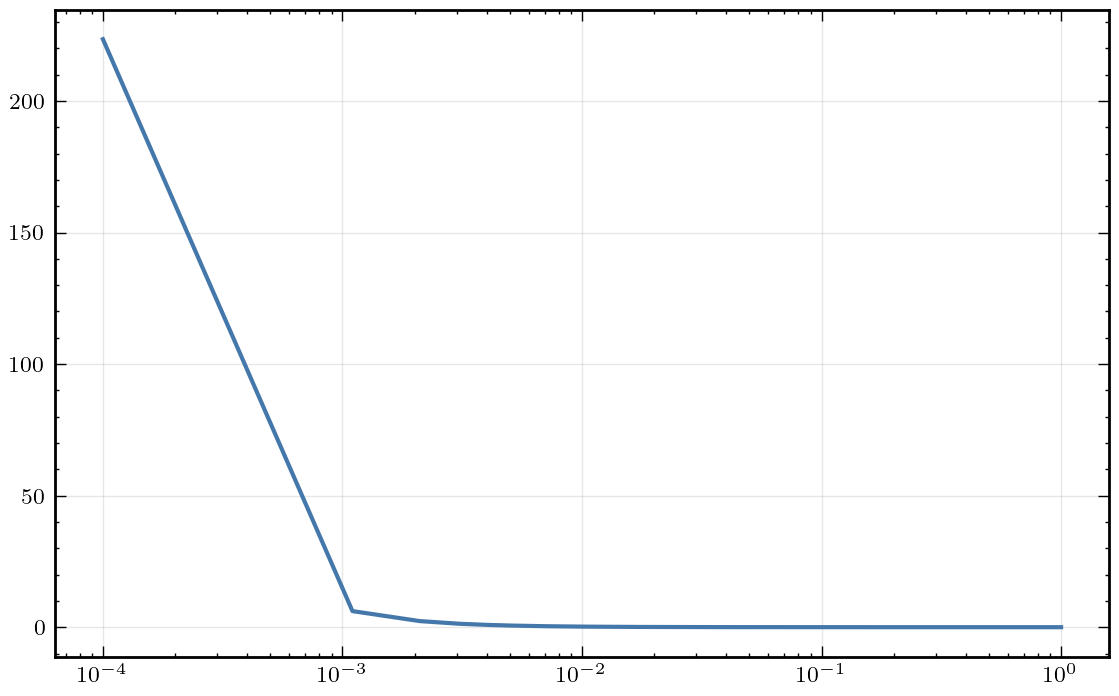

In [3]:
aa = np.linspace(1e-4, 1, 1000)

plt.semilogx(aa, pert_m.Hubble(aa, pars=pars))

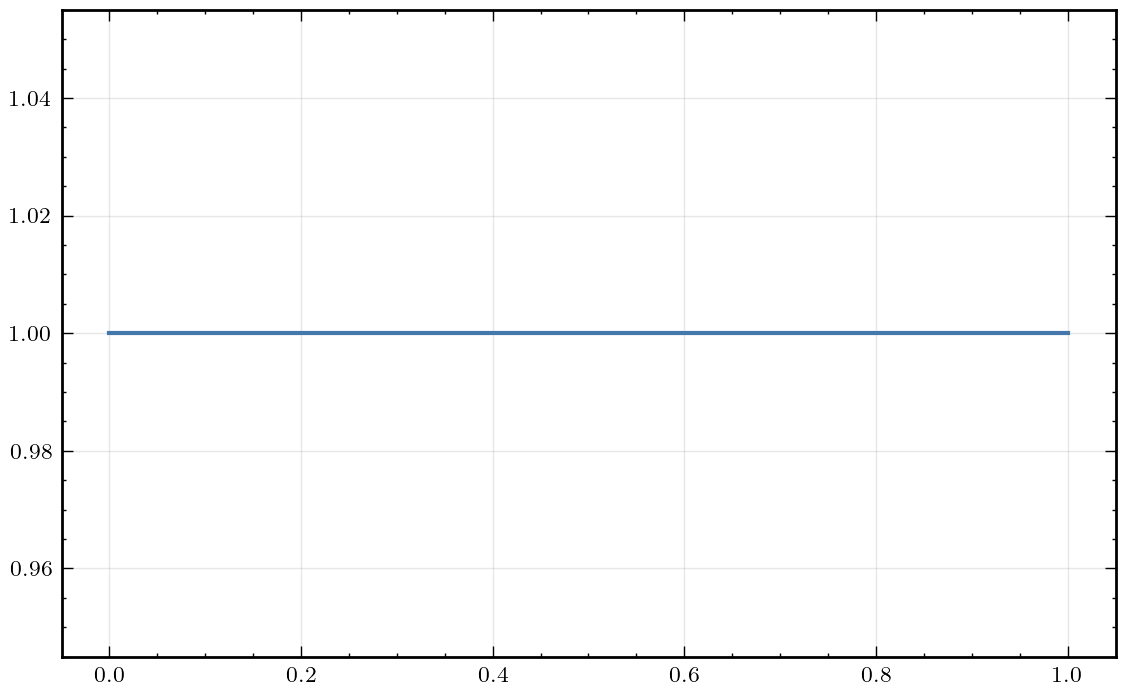

In [4]:
plt.plot(aa, pert_m.Omega_m(aa, pars))

## Testing potentials

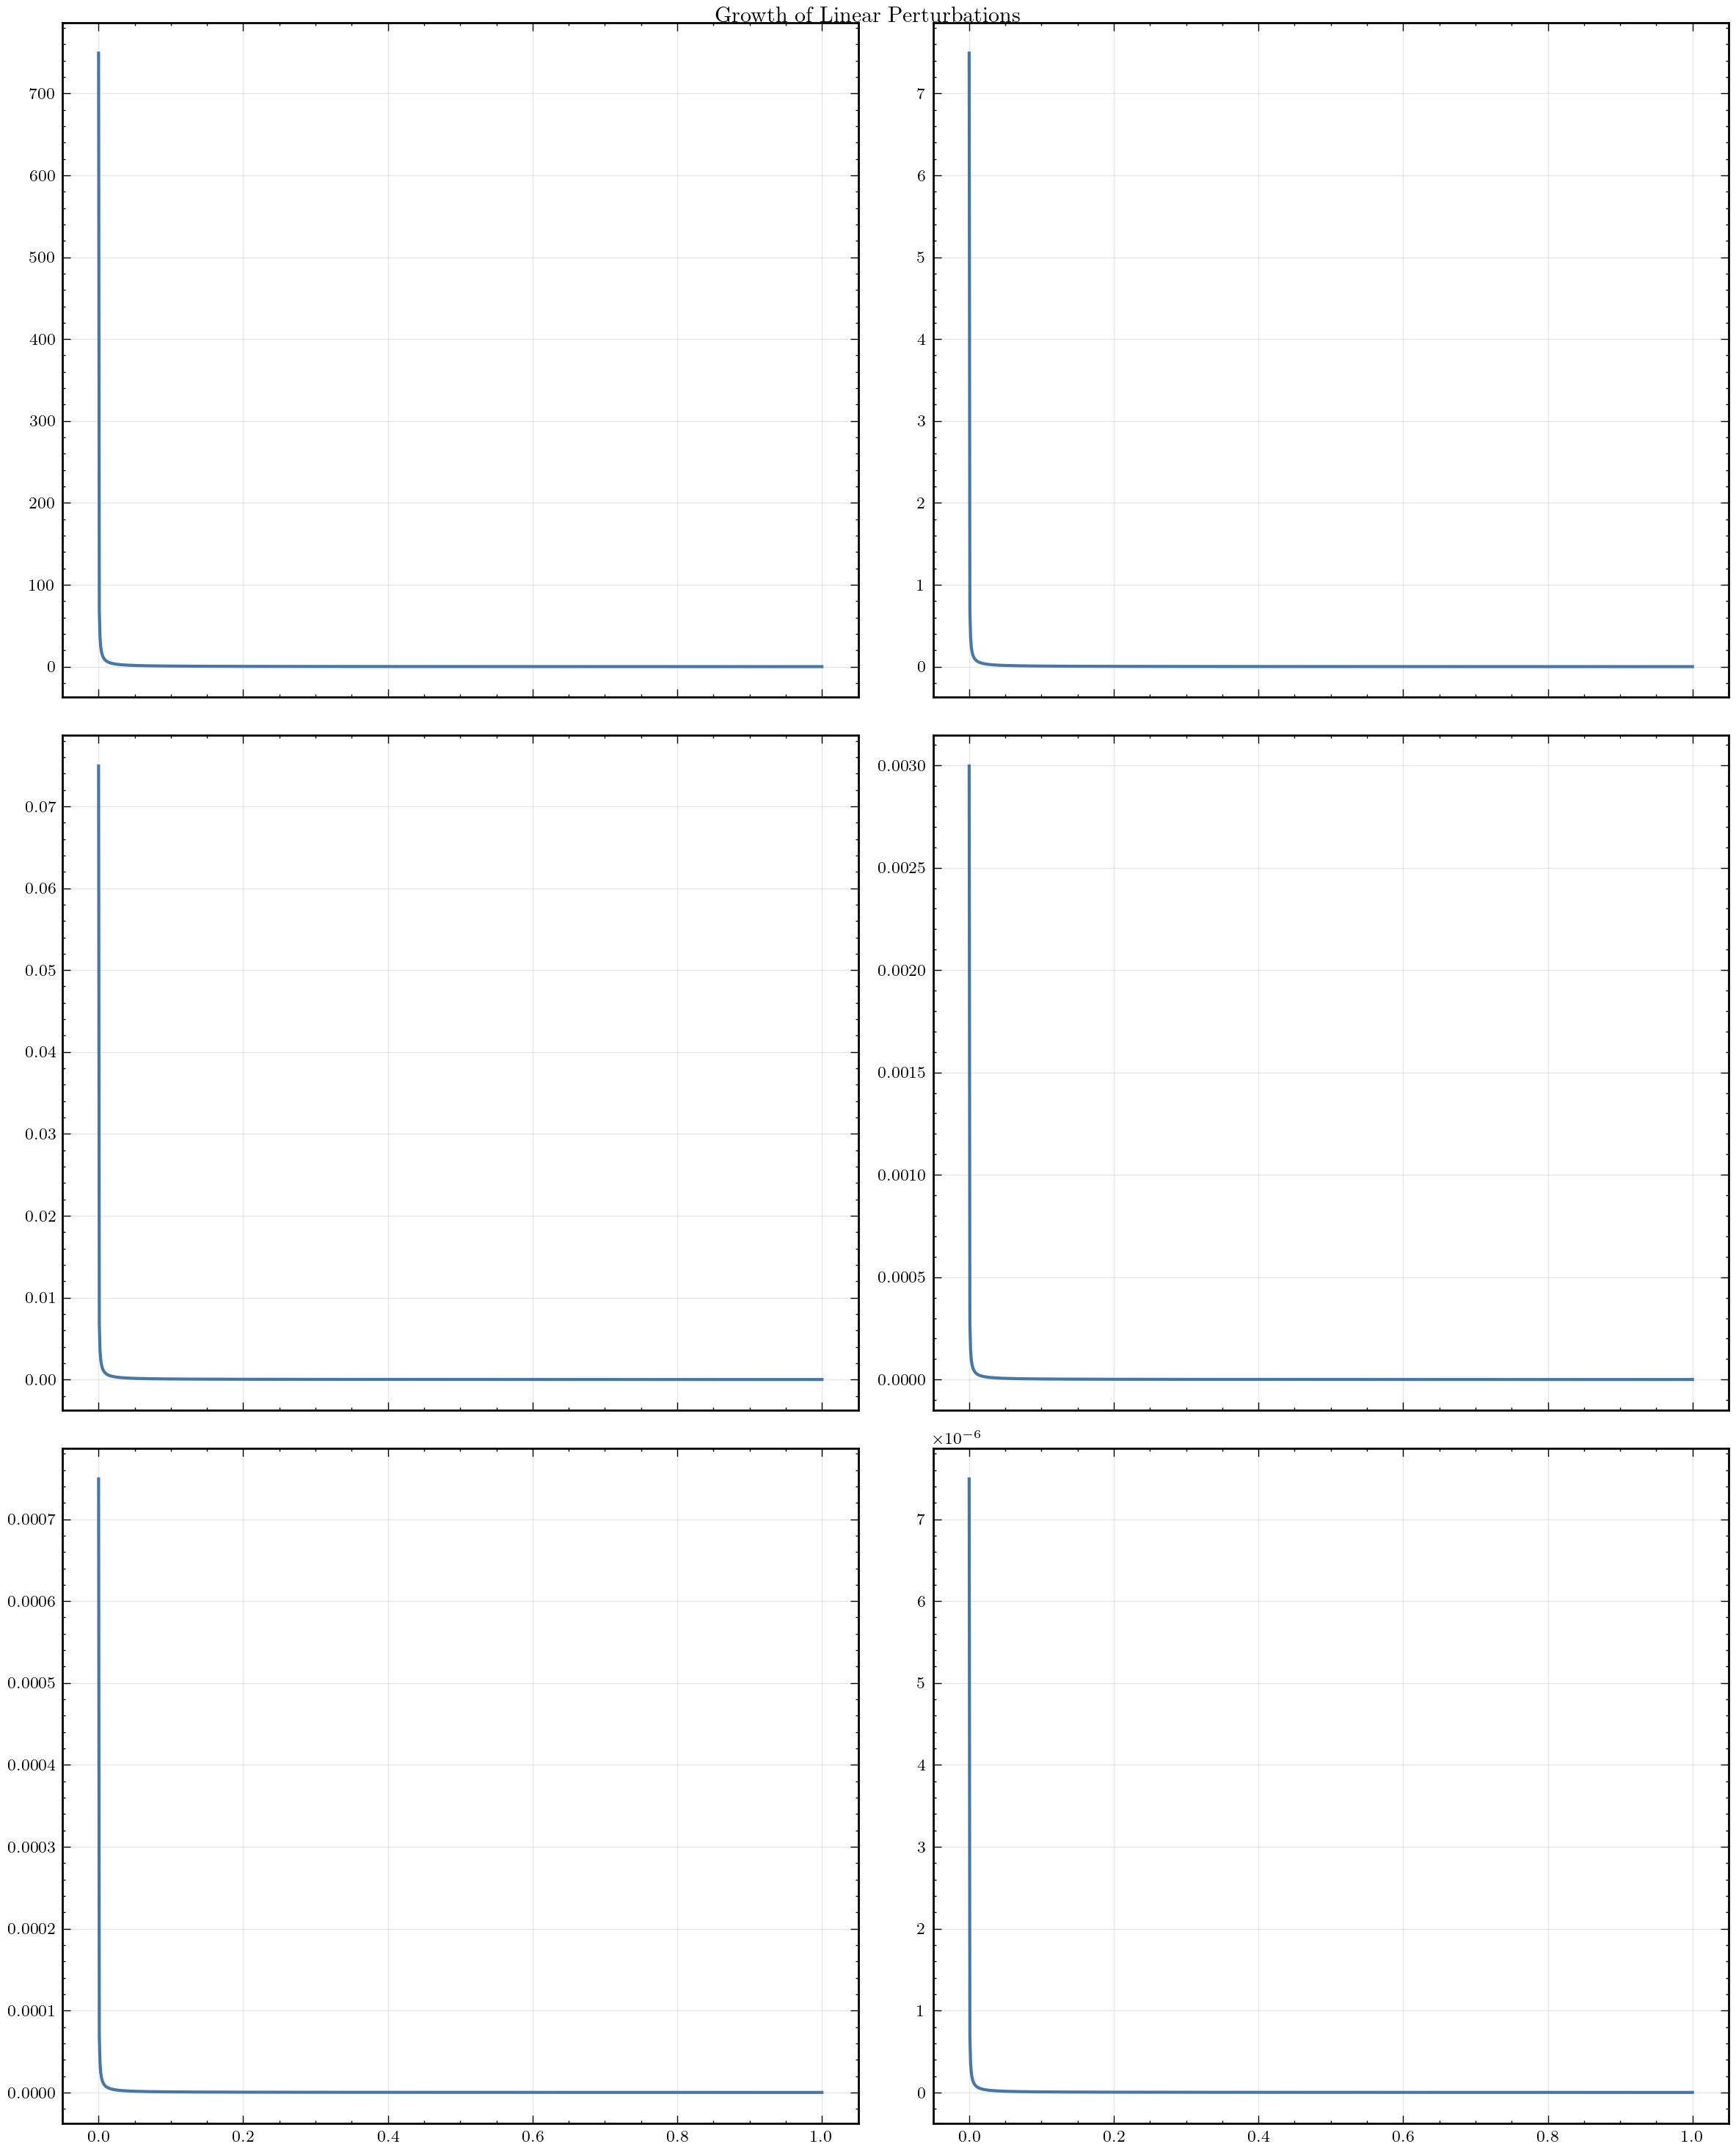

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(12, 15), sharex=True)
ax = ax.flatten()
kk = np.array([1e-3, 1e-2, 1e-1, .5, 1, 10.])
zeros = np.zeros_like(aa)

for idx, k in enumerate(kk):
    # ax.plot(aa[1:], np.diff(pert_m.phi(aa, k, [aa, zeros])), label=fr'$k={k}$ Mpc'r'$^{-1}$')
    ax[idx].plot(aa[1:], pert_m.dphida(aa, k, [aa, zeros]), label=fr'$k={k}$ Mpc'r'$^{-1}$')
# Axis labels
# ax.set_xlabel(r'Scale factor $a$')
# ax.set_ylabel(r'Growth of $\theta_\mathrm{m}$')

# Legends
# ax.legend(fontsize=10)

# Global title
fig.suptitle("Growth of Linear Perturbations")

# Layout
fig.tight_layout()

## Solving the system

In [ ]:
a_ini, a_end = 1e-4, 1.0

X0 = [a_ini, -pert_m.Hubble(a_ini, pars)*a_ini**2]   # Initial conditions (tiny perturbation in matter)
kk = np.array([1e-3, 1e-2, 1e-1, .5, 1, 10.])
X_ivp = {}

for k in kk:
    X_ivp[k] = solve_ivp(fun=lambda a, X: pert_m.rhs_pert(a, X, k, pars),
                         t_span=(a_ini, a_end),
                         y0=X0,
                         method='BDF',
                         dense_output=True,
                         rtol=1e-7, atol=1e-10)

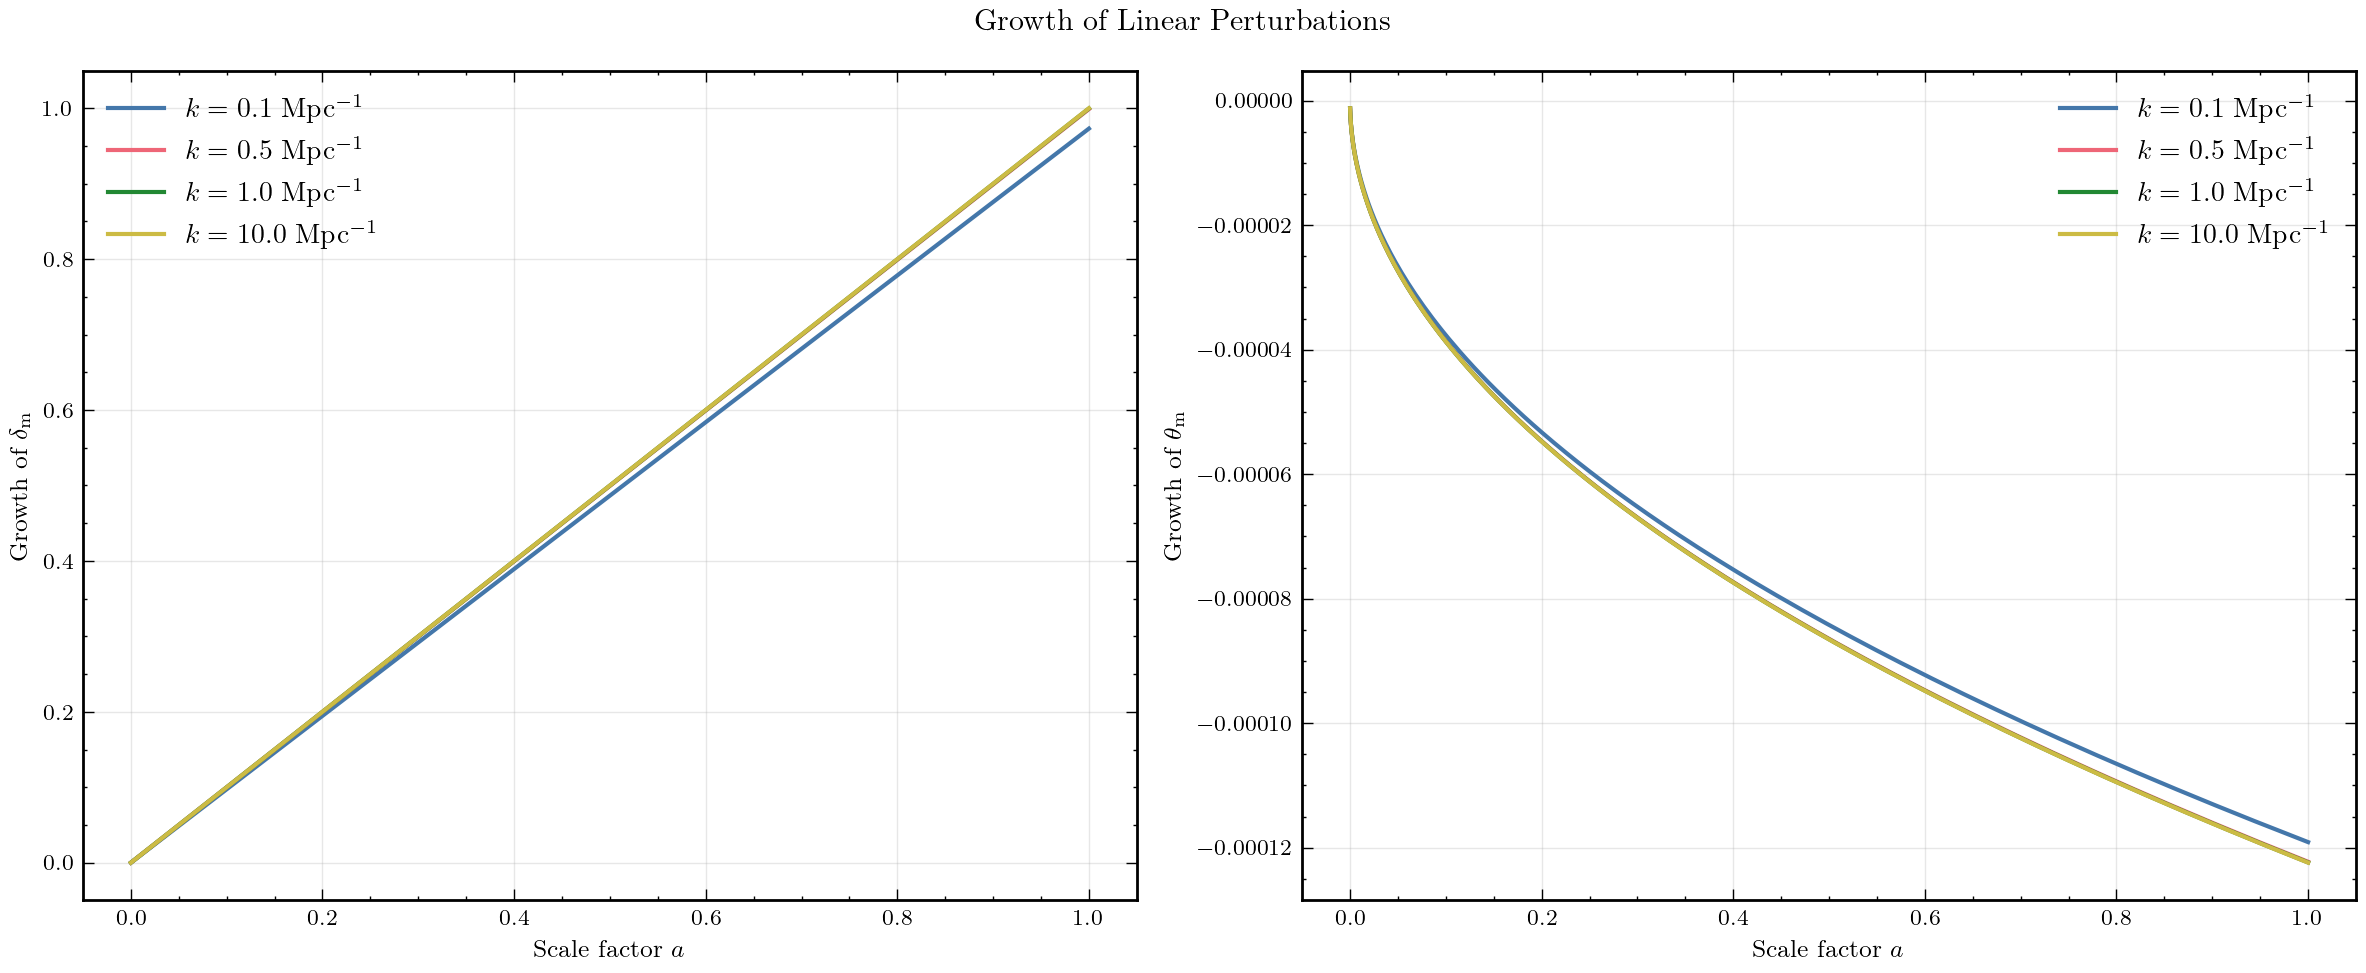

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

for idx, k in enumerate(kk[2:]):
    ax[0].plot(X_ivp[k].t, X_ivp[k].y[0], label=fr'$k={k}$ Mpc'r'$^{-1}$')
    ax[1].plot(X_ivp[k].t, X_ivp[k].y[1], label=fr'$k={k}$ Mpc'r'$^{-1}$')

# Axis labels
ax[0].set_xlabel(r'Scale factor $a$')
ax[1].set_xlabel(r'Scale factor $a$')
ax[0].set_ylabel(r'Growth of $\delta_\mathrm{m}$')
ax[1].set_ylabel(r'Growth of $\theta_\mathrm{m}$')

# Legends
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)

# Global title
fig.suptitle("Growth of Linear Perturbations")

# Layout
fig.tight_layout()

# Matter and Cosmological Constant

In [7]:
pars = vp_pt.cosmo_parameters

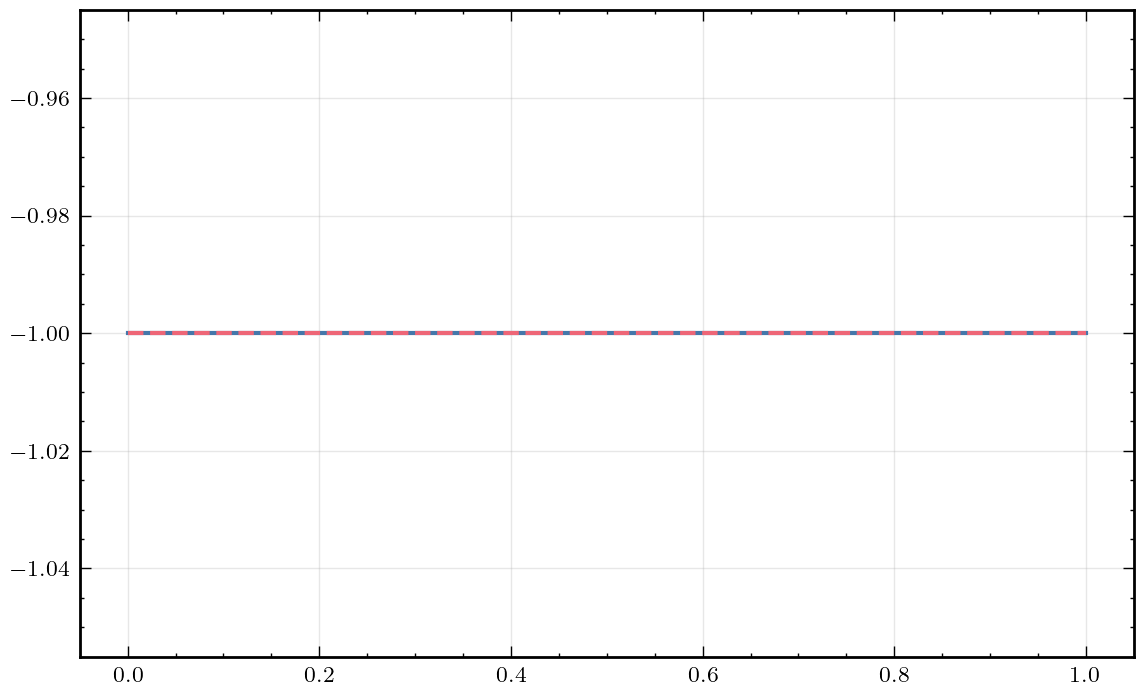

In [8]:
aa = np.linspace(1e-4, 1, 1000)

plt.plot(aa, vp_pt.w_de(aa))
plt.plot(aa, vp_pt.eff_w_de(aa), '--')

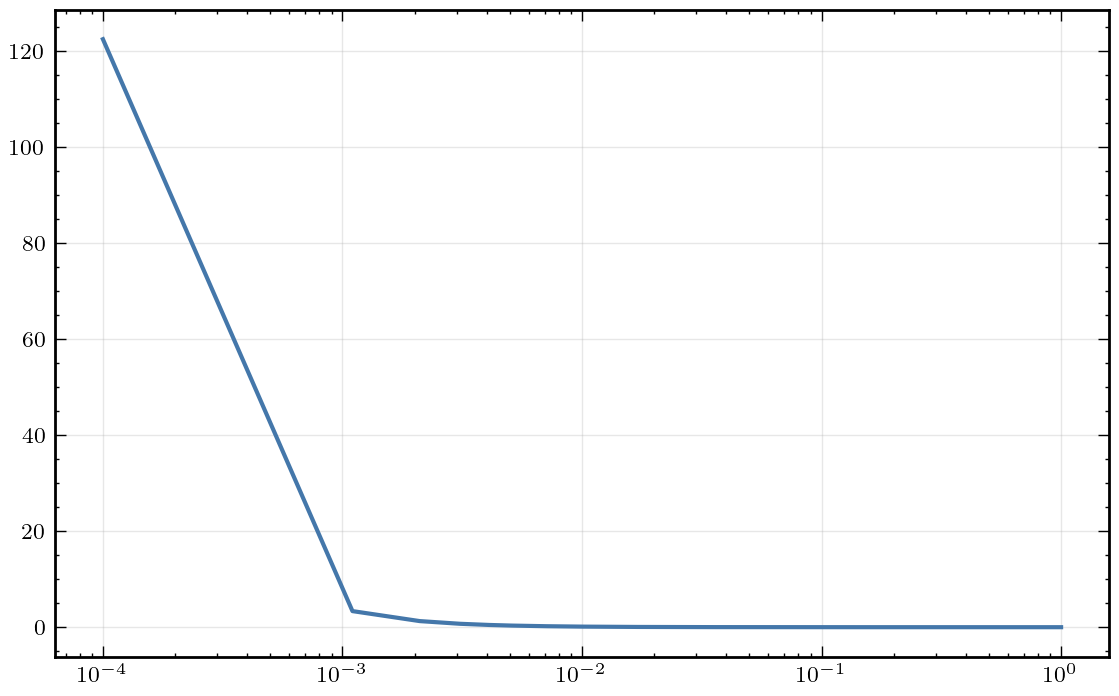

In [9]:
plt.semilogx(aa, vp_pt.Hubble(aa, pars=pars))

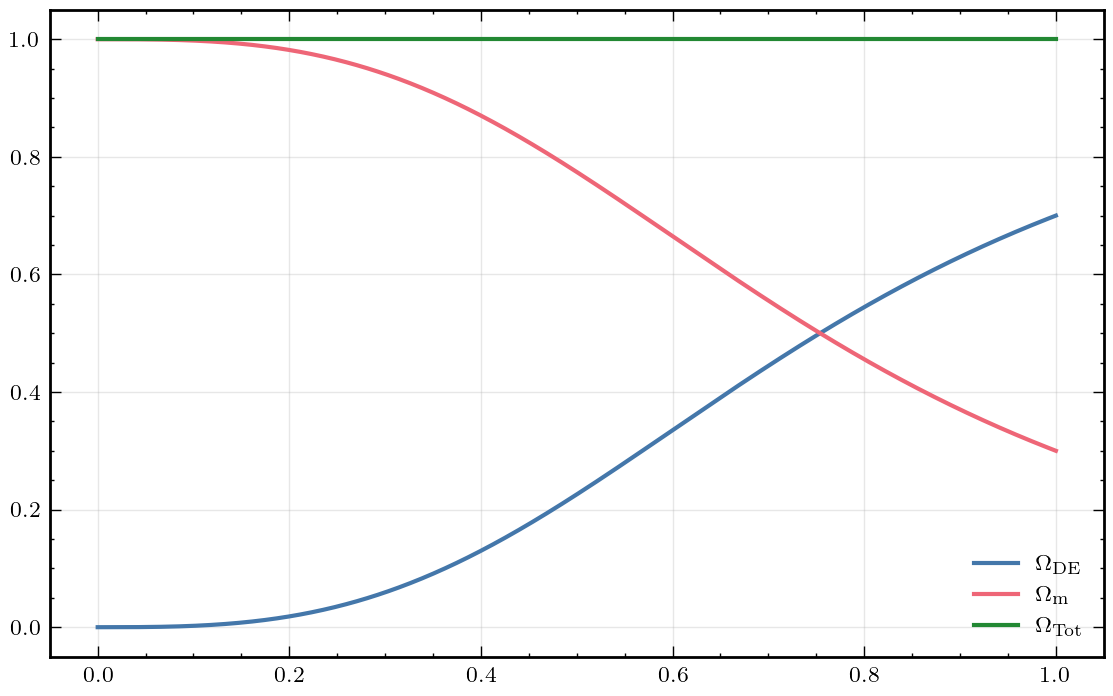

In [10]:
fig, ax = plt.subplots()

ax.plot(aa, vp_pt.Omega_de(aa), label=r'$\Omega_\text{DE}$')
ax.plot(aa, vp_pt.Omega_m(aa), label=r'$\Omega_\text{m}$')
ax.plot(aa, vp_pt.Omega_de(aa) + vp_pt.Omega_m(aa), label=r'$\Omega_\text{Tot}$')

ax.legend()

In [11]:
a_ini, a_end = 1e-4, 1.0
X0 = [1e-4, 1e-8, 0.0, 0.0]   # Initial conditions (tiny perturbation in matter)

X_ivp = {}

for k in kk:
    X_ivp[k] = solve_ivp(vp_pt.rhs_pert, (a_ini, a_end), X0, t_eval=aa, args=(k, pars))

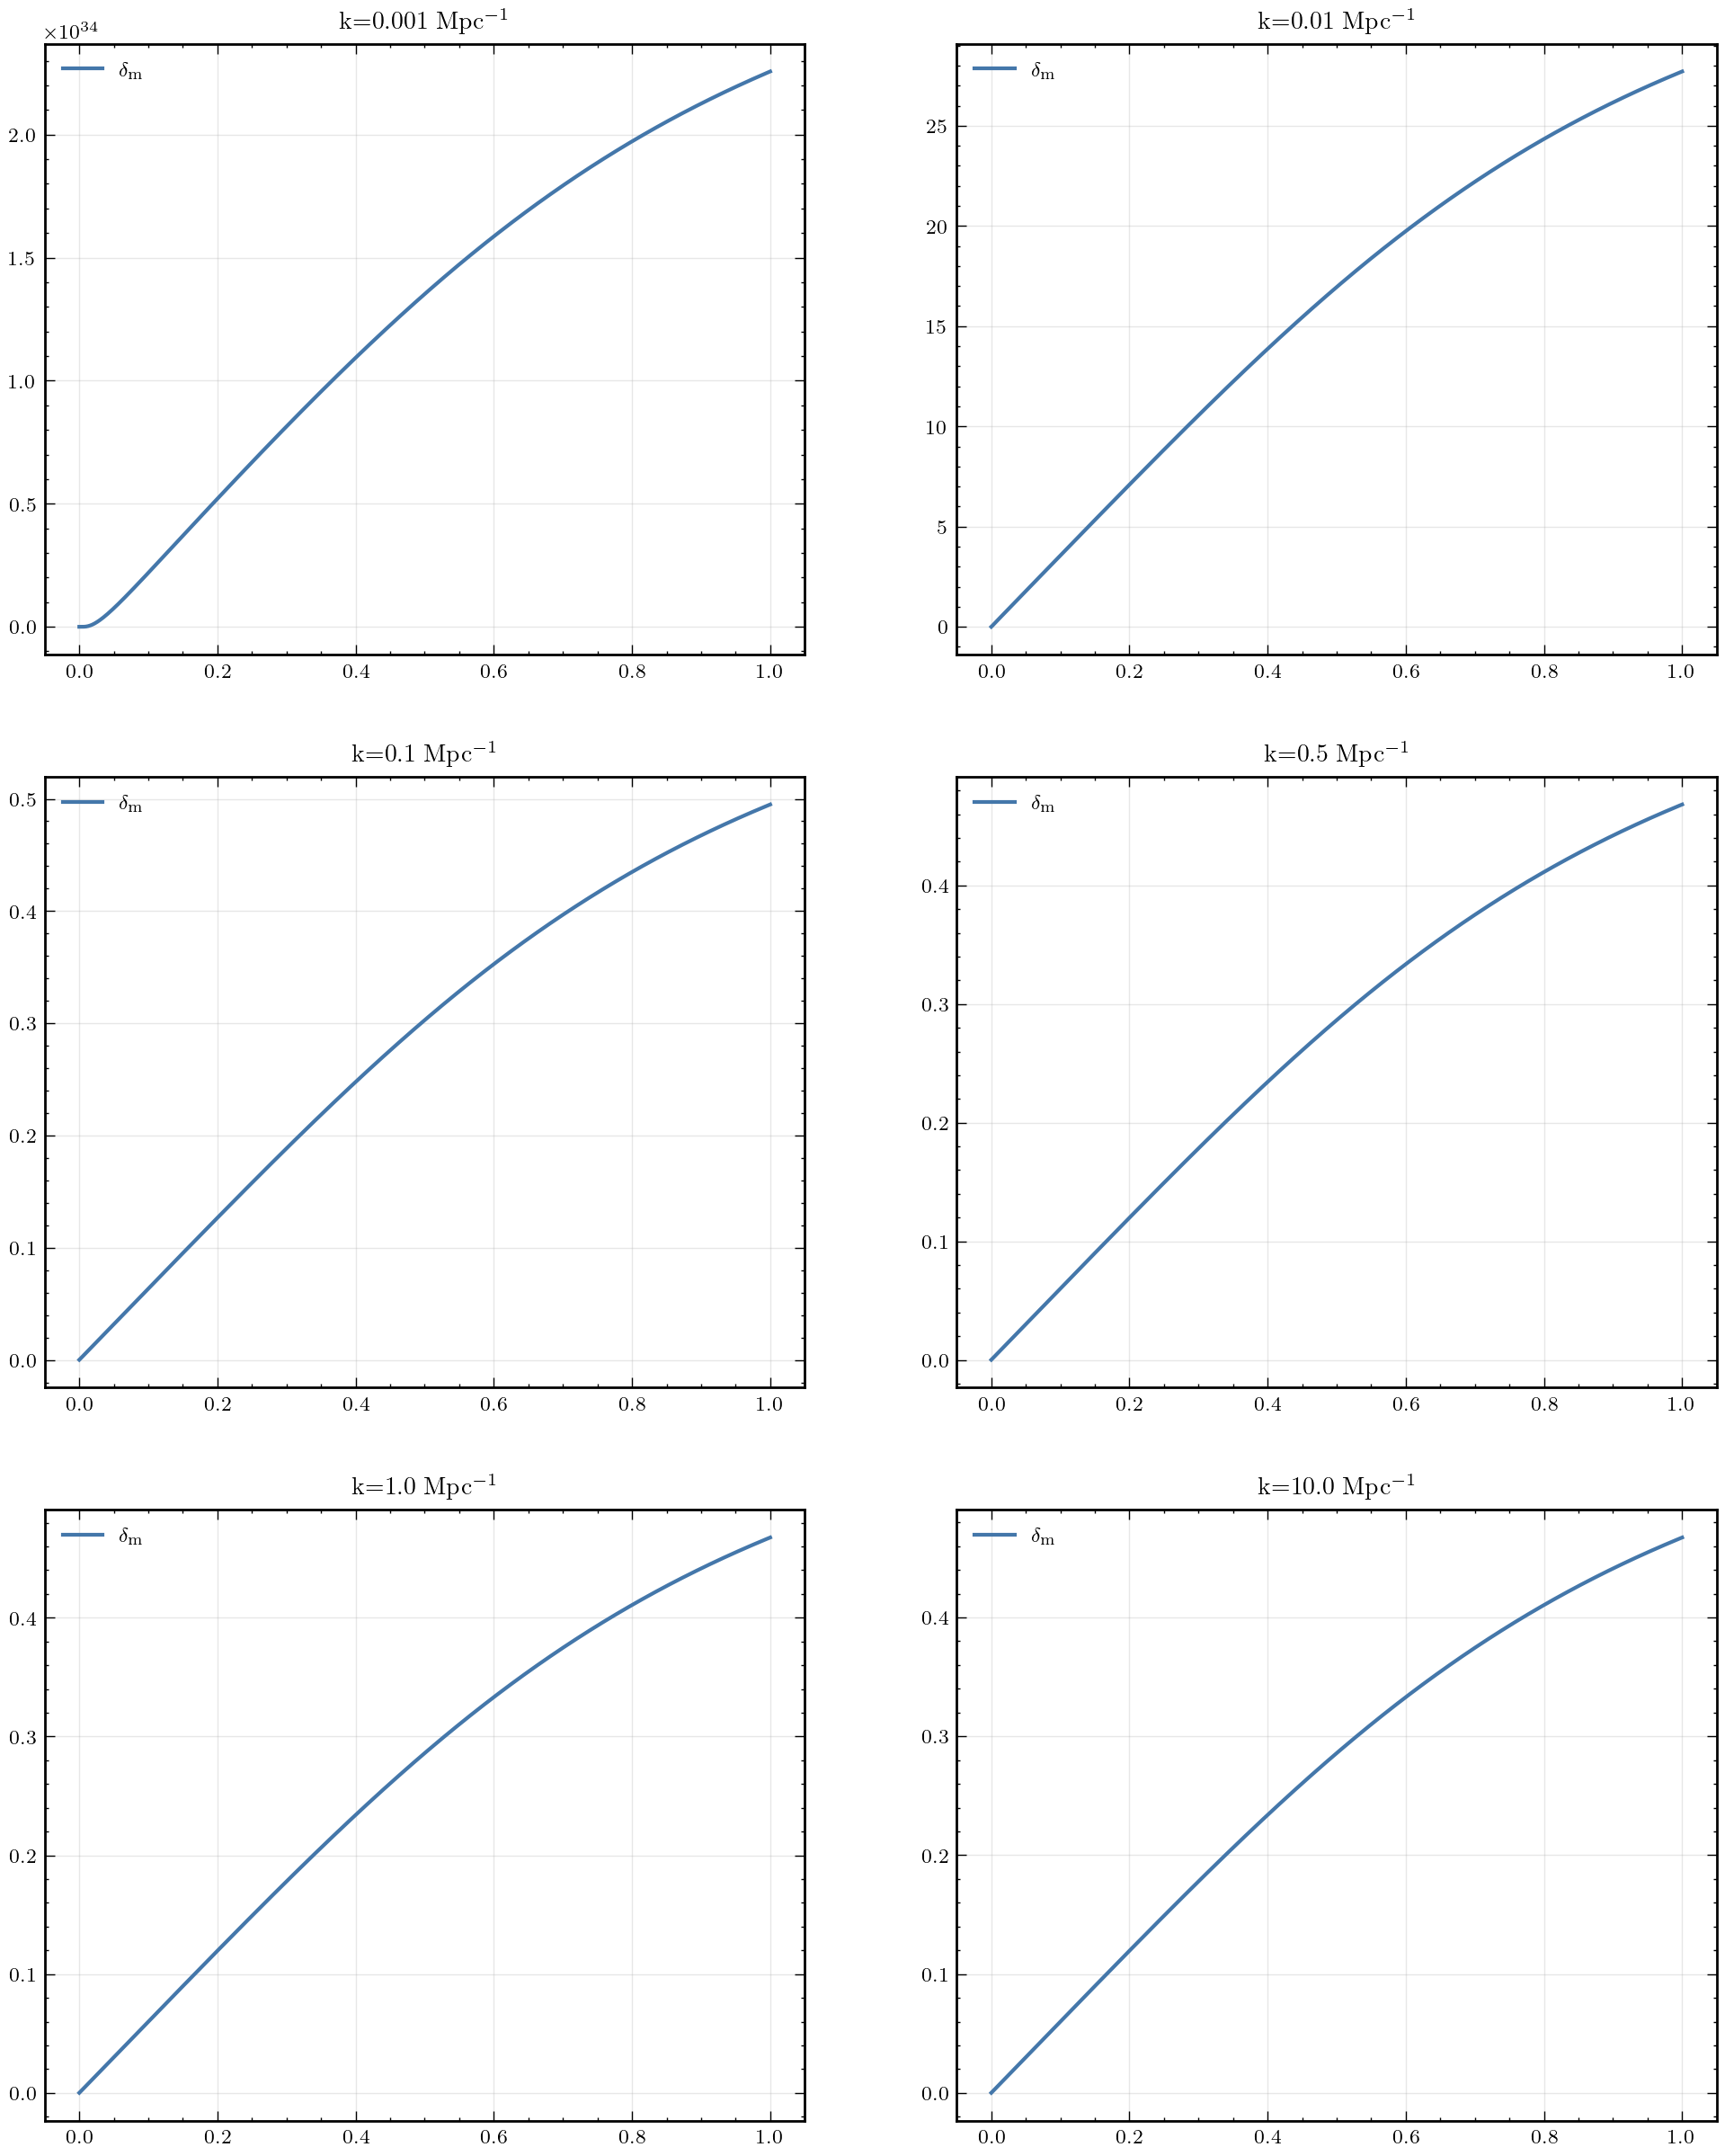

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
ax = ax.flatten()

for idx, k in enumerate(kk):
    ax[idx].plot(X_ivp[k].t, X_ivp[k].y[0], label=r'$\delta_\text{m}$')
    # ax[idx].plot(X_ivp[k].t, X_ivp[k].y[1], label=r'$\theta_\text{m}$')
    ax[idx].legend()
    ax[idx].set_title(f'k={k} 'r'Mpc$^{-1}$')

In [13]:
manual_phi = {}
manual_dphida = {}

for k in kk:
    manual_phi[k] = vp_pt.phi(aa, k, [X_ivp[k].y[0], X_ivp[k].y[1], np.zeros(X_ivp[k].y[0].shape[0]),np.zeros(X_ivp[k].y[0].shape[0])], pars=pars)
    manual_dphida[k] = vp_pt.dphida(aa, k, [X_ivp[k].y[0], X_ivp[k].y[1], np.zeros(X_ivp[k].y[0].shape[0]),np.zeros(X_ivp[k].y[0].shape[0])], pars=pars)

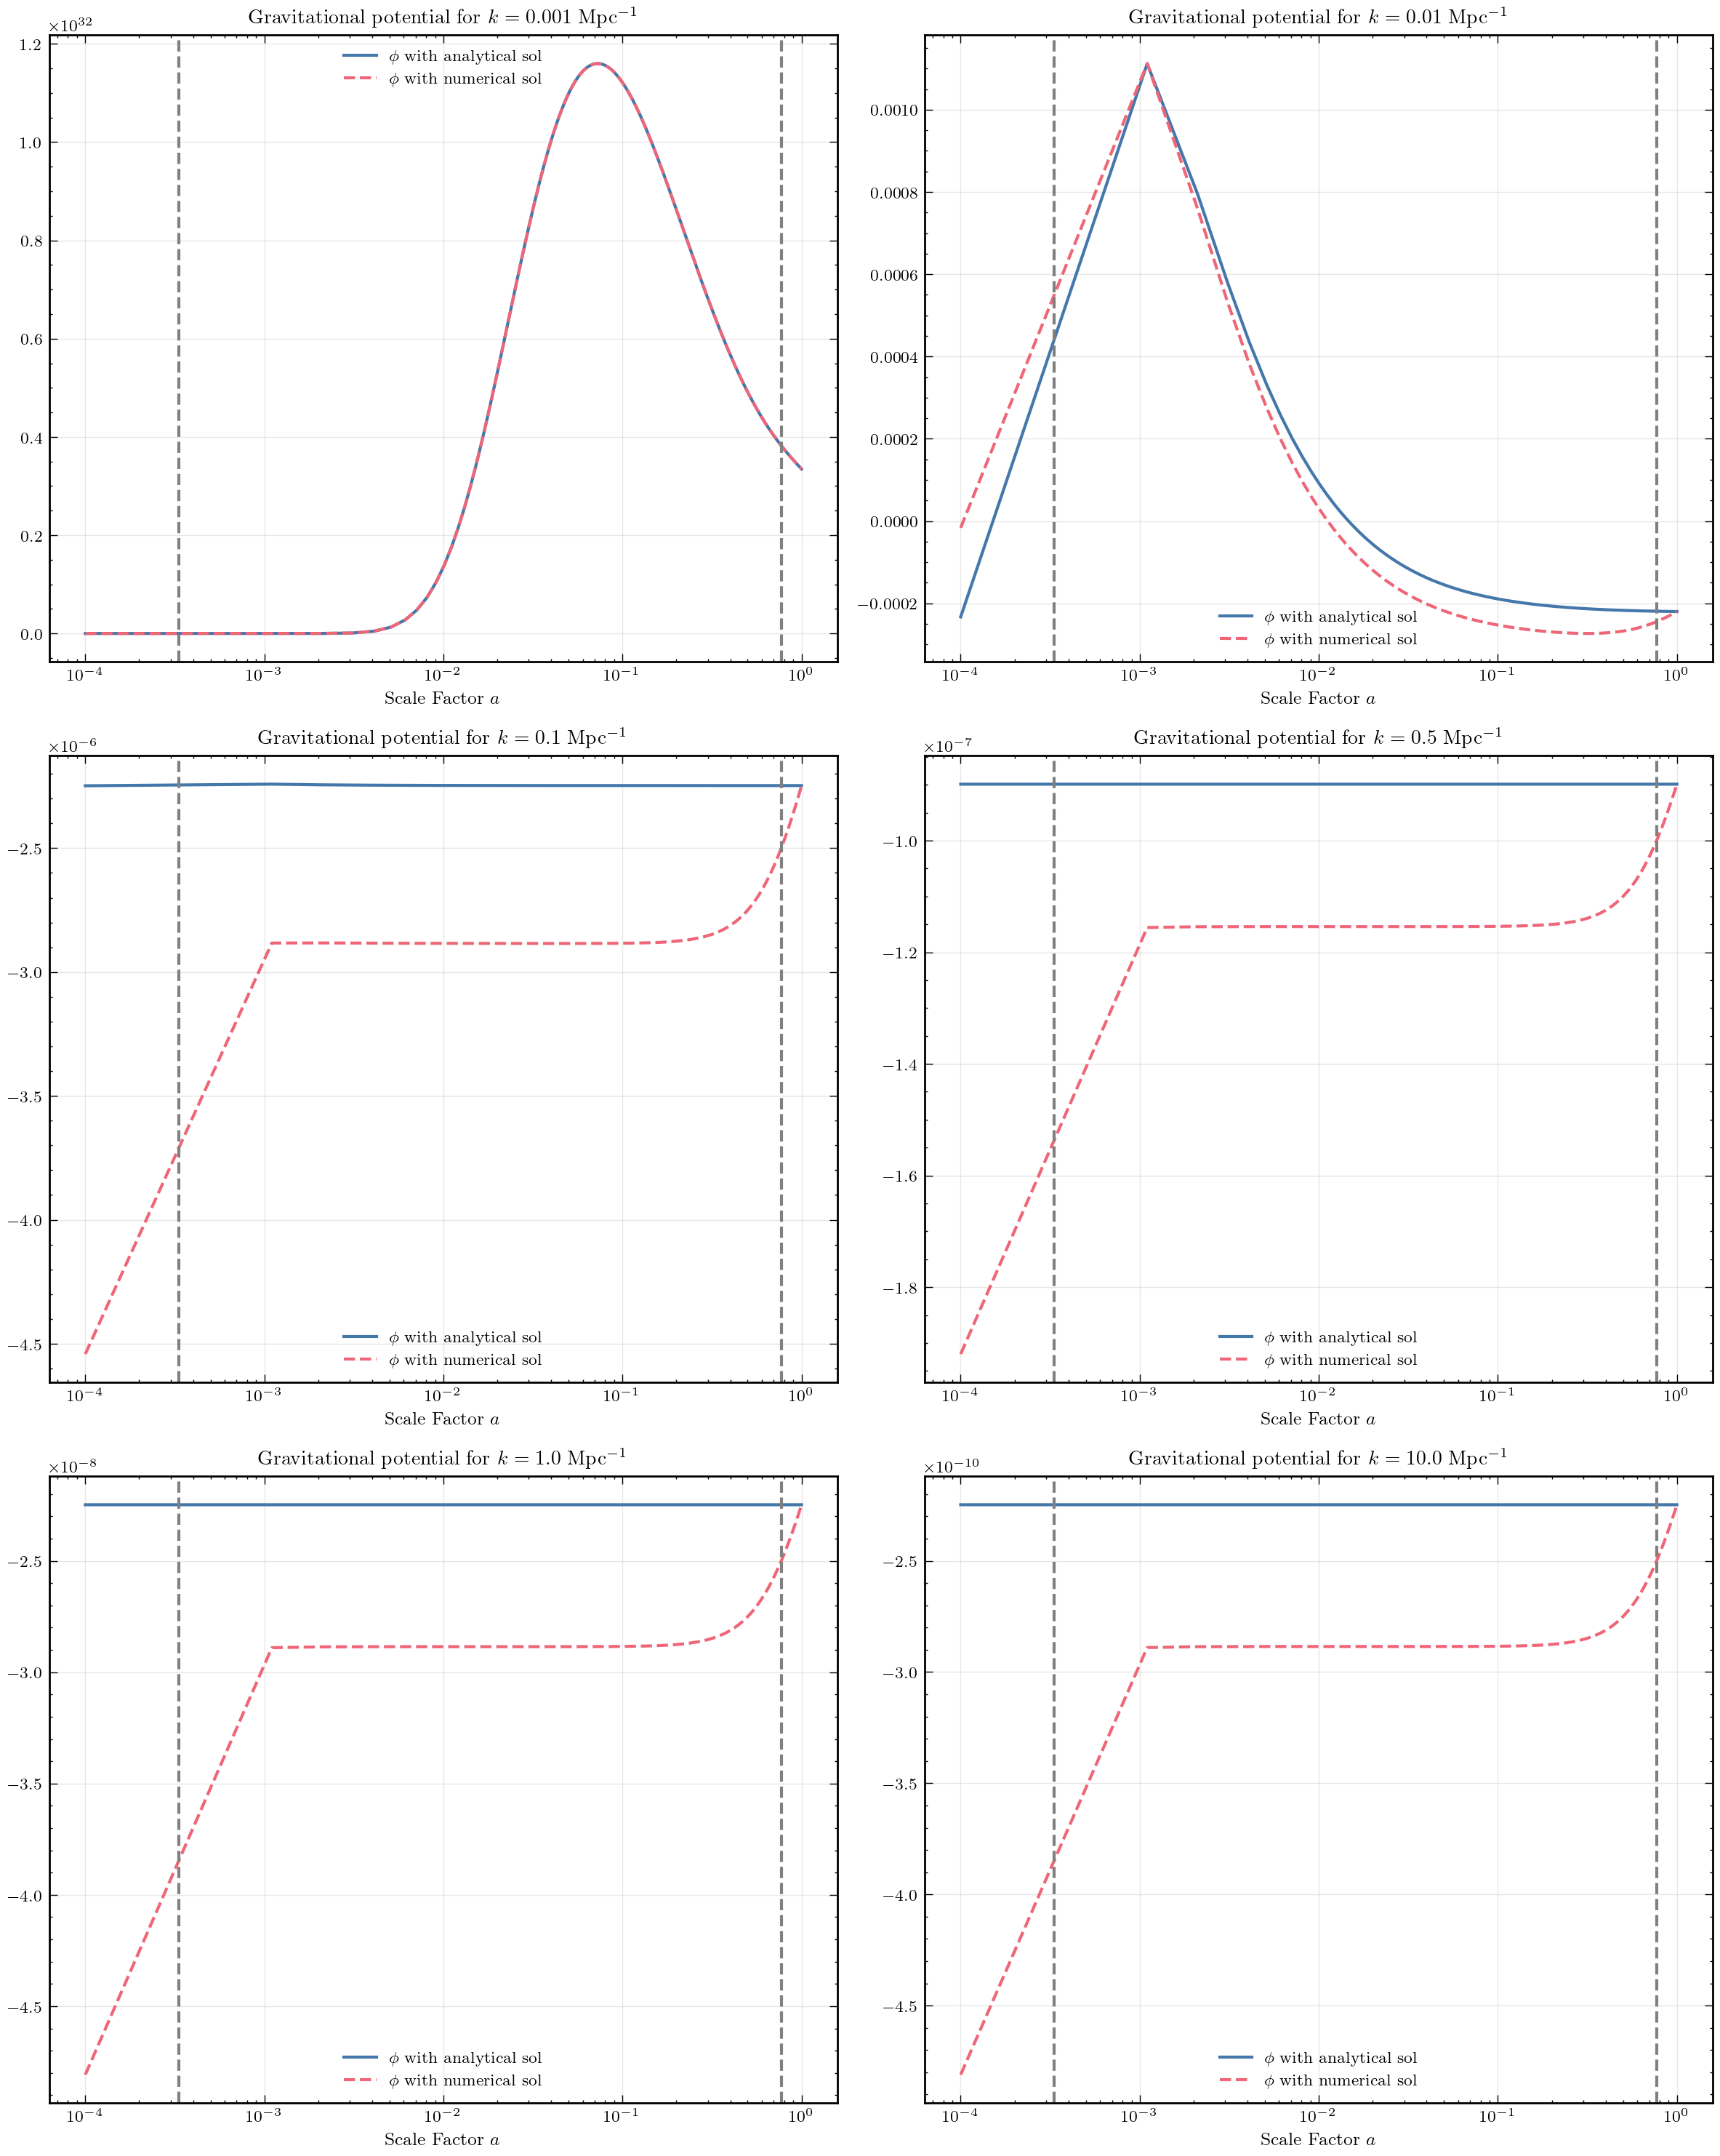

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows, 2 cols
ax = ax.flatten()  # make it a 1D array for easy indexing
zeros = np.zeros_like(aa)
for idx, k in enumerate(kk):
    ax[idx].semilogx(aa, vp_pt.phi(aa, k, [aa, X_ivp[k].y[1], zeros, zeros]), label=r'$\phi$ with analytical sol')
    ax[idx].semilogx(aa, vp_pt.phi(aa, k, [X_ivp[k].y[0]/X_ivp[k].y[0][-1], X_ivp[k].y[1], zeros, zeros]), '--', label=r'$\phi$ with numerical sol')


    ax[idx].axvline(x=1/(1+.3), color='gray', linestyle='--')
    ax[idx].axvline(x=1/(1+3000), color='gray', linestyle='--')

    ax[idx].set_title(f'Gravitational potential for $k={k}$' + r' Mpc$^{-1}$')
    ax[idx].set_xlabel('Scale Factor $a$')
    ax[idx].legend()
    # ax[idx].set_xlim((0.2,1))

plt.tight_layout()
plt.show()

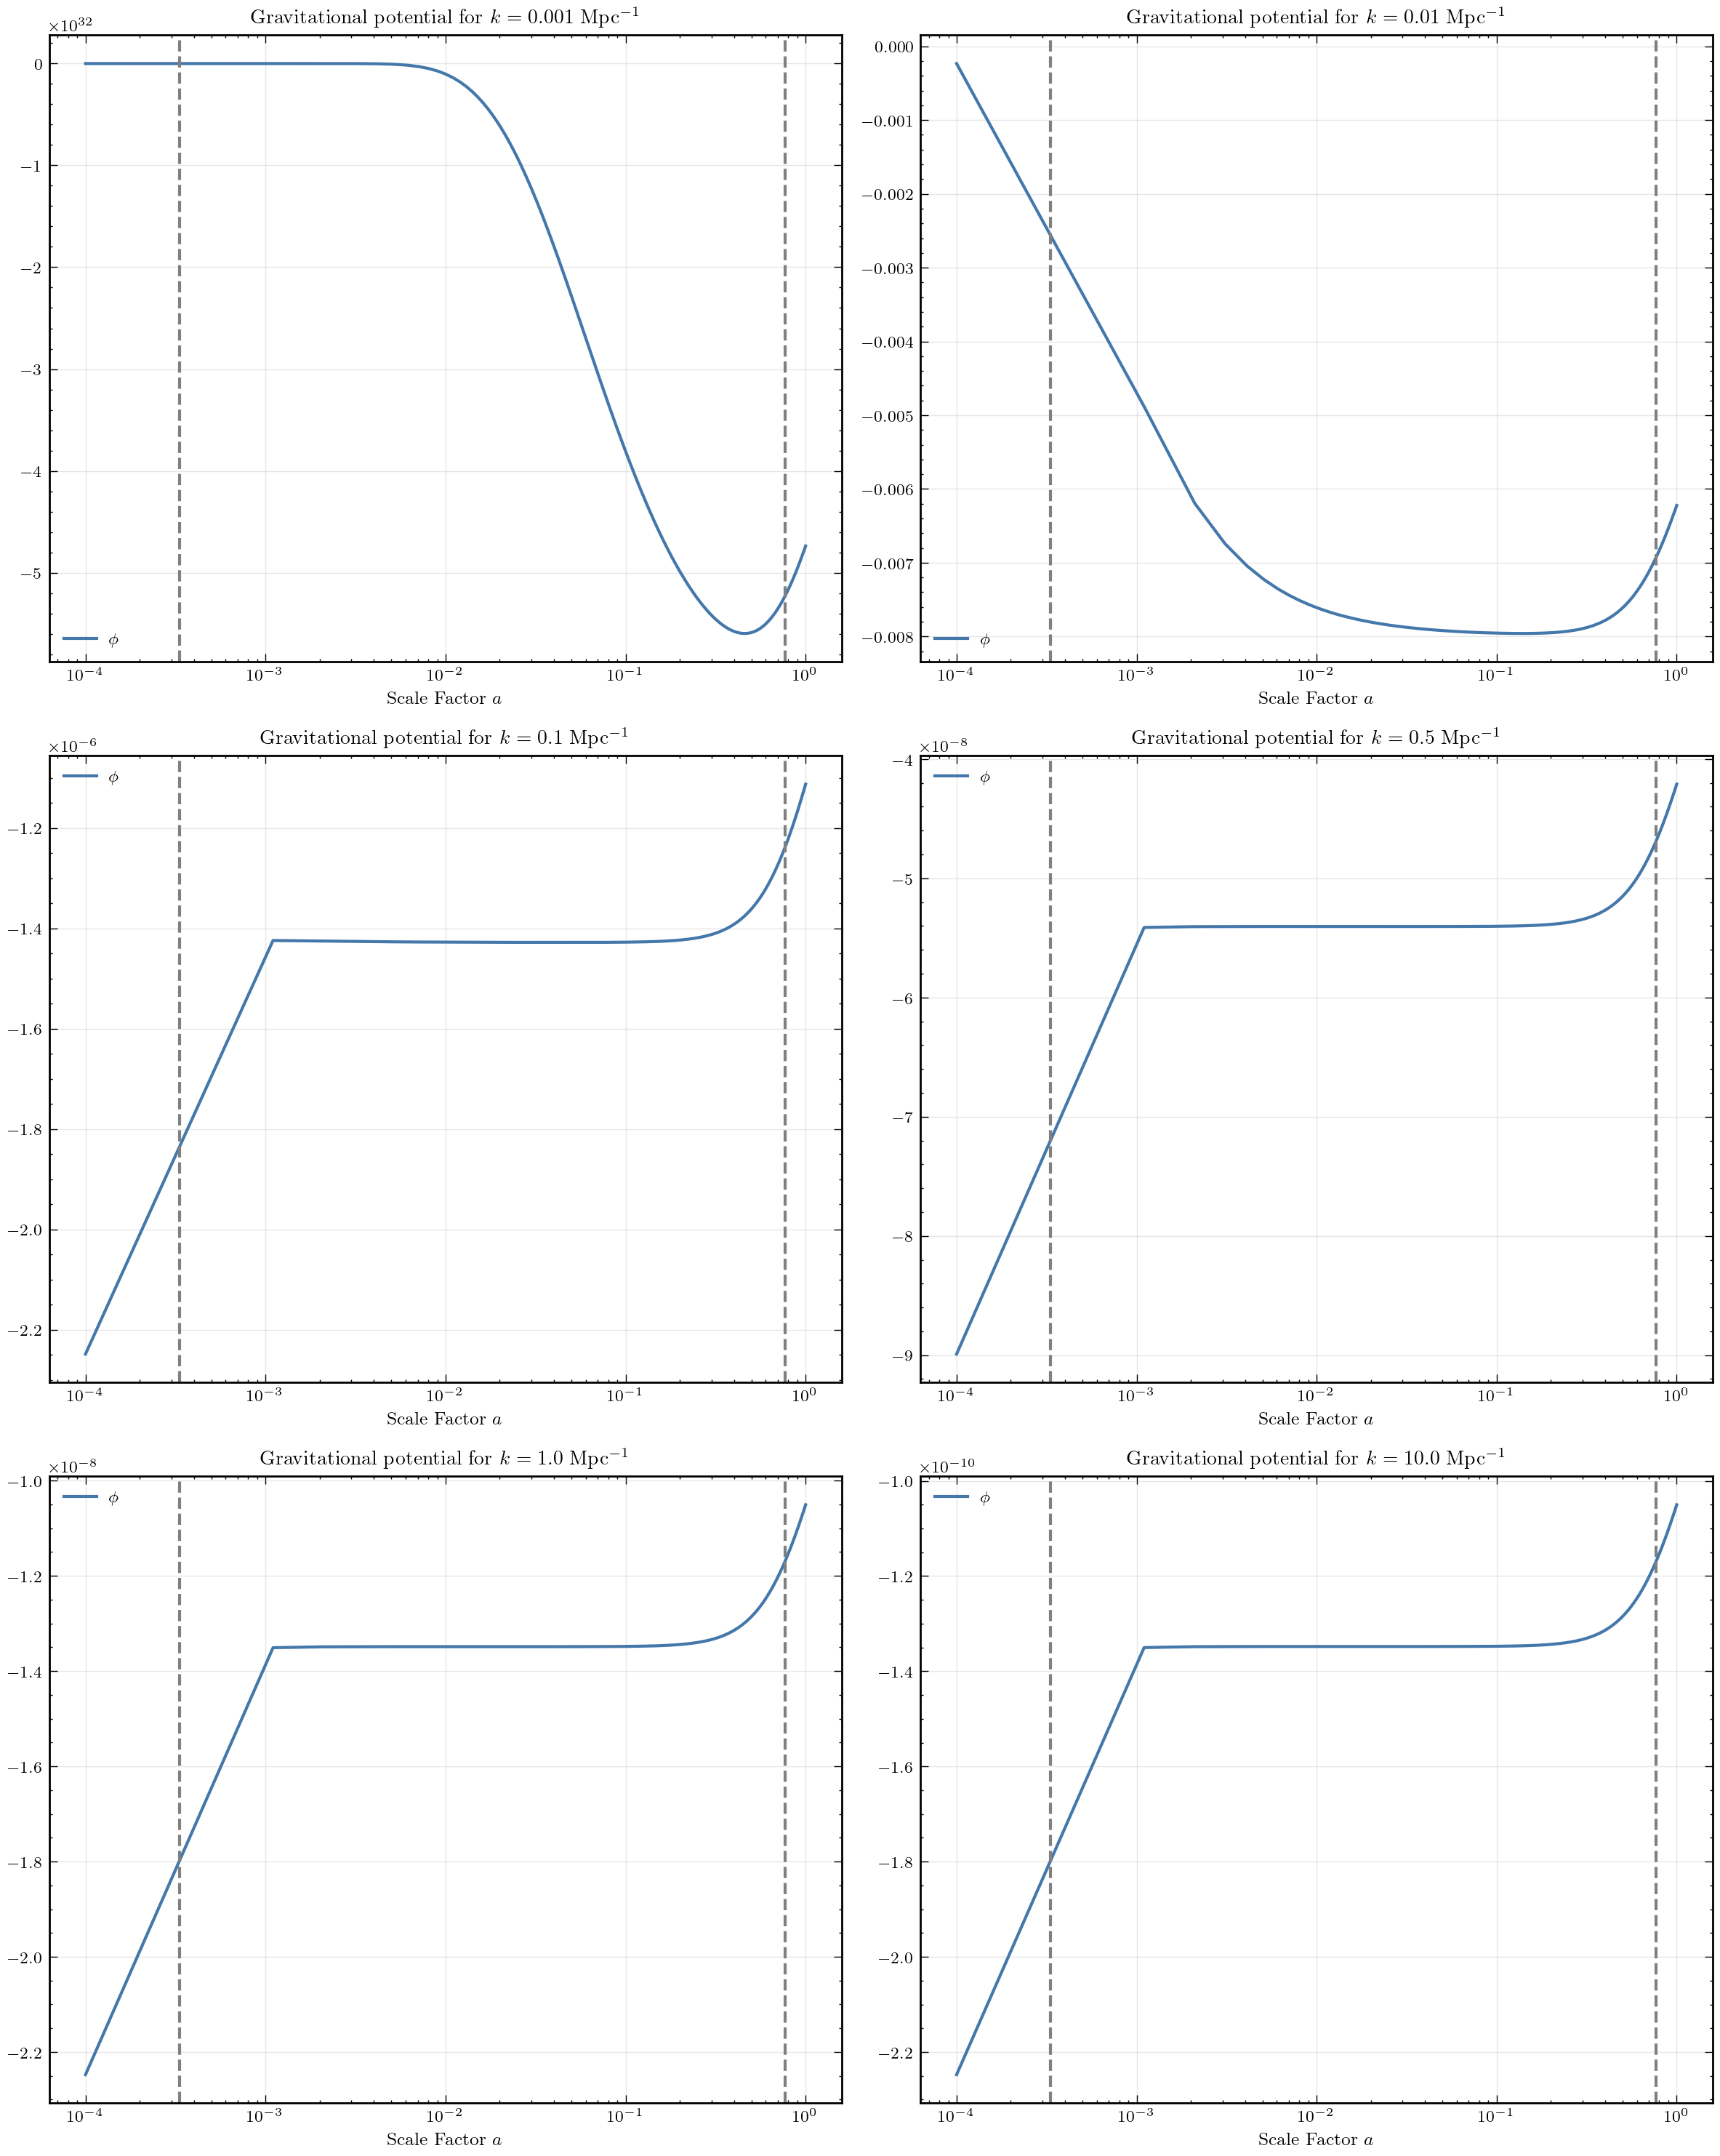

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows, 2 cols
ax = ax.flatten()  # make it a 1D array for easy indexing

for idx, k in enumerate(kk):
    ax[idx].semilogx(aa, manual_phi[k], label=r'$\phi$')


    ax[idx].axvline(x=1/(1+.3), color='gray', linestyle='--')
    ax[idx].axvline(x=1/(1+3000), color='gray', linestyle='--')

    ax[idx].set_title(f'Gravitational potential for $k={k}$' + r' Mpc$^{-1}$')
    ax[idx].set_xlabel('Scale Factor $a$')
    ax[idx].legend()
    # ax[idx].set_xlim((0.2,1))

plt.tight_layout()
plt.show()

NameError: name 'pt' is not defined

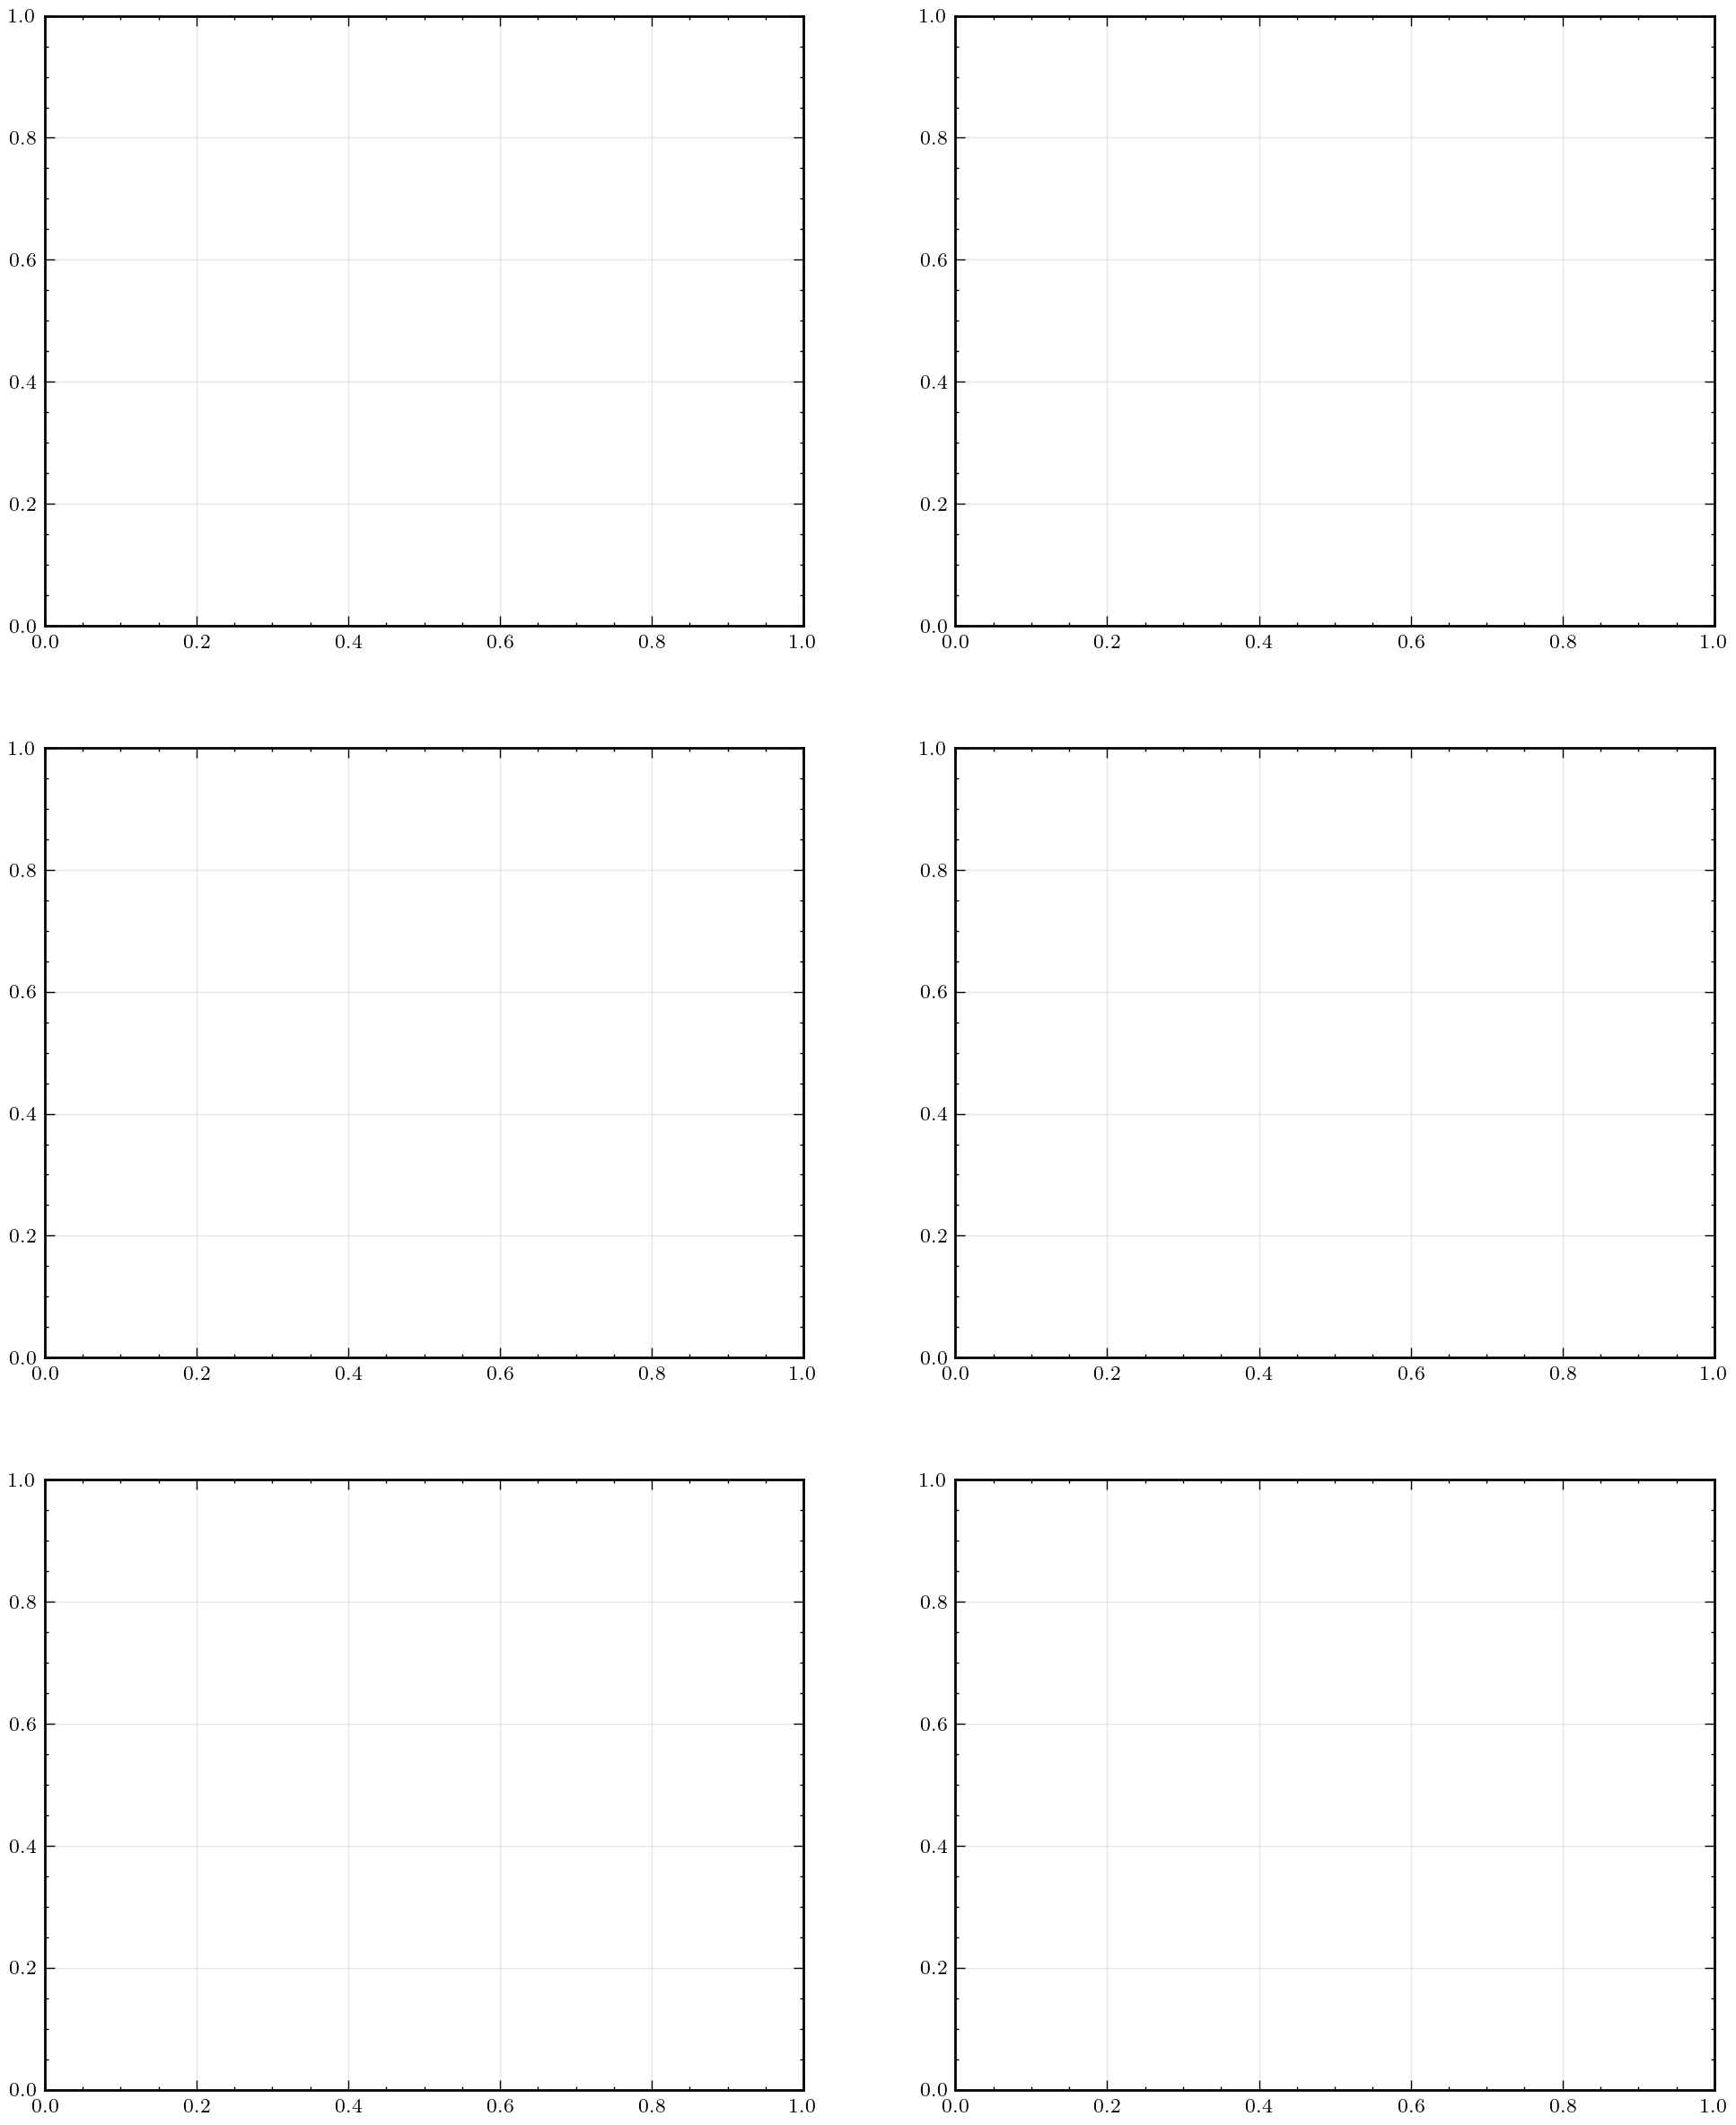

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows, 2 cols
ax = ax.flatten()  # make it a 1D array for easy indexing

for idx, k in enumerate(kk):
    # mask = np.where(pt[idx]['a']>=1e-4)
    ax[idx].semilogx(pt[idx]['a'], phi[k], label='$\phi$ CLASS')
    ax[idx].semilogx(pt[idx]['a'], psi[k], label='$\psi$ CLASS')
    # ax[idx].semilogx(pt[idx]['a'], psi[k], '--', label='$\psi$')
    # ax[idx].semilogx(X_ivp[k].t, vp_pt.phi(X_ivp[k].t, k, X_ivp[k].y), '--', label='$\phi$ manual ')

    ax[idx].axvline(x=1/(1+.3), color='gray', linestyle='--')
    ax[idx].axvline(x=1/(1+3500), color='gray', linestyle='--')
    ax[idx].set_title(f'CLASS potentials $k={k}$' + r' Mpc$^{-1}$')
    ax[idx].set_xlabel('Scale Factor $a$')
    ax[idx].legend()
    # ax[idx].set_xlim((1e-4,1))

plt.tight_layout()

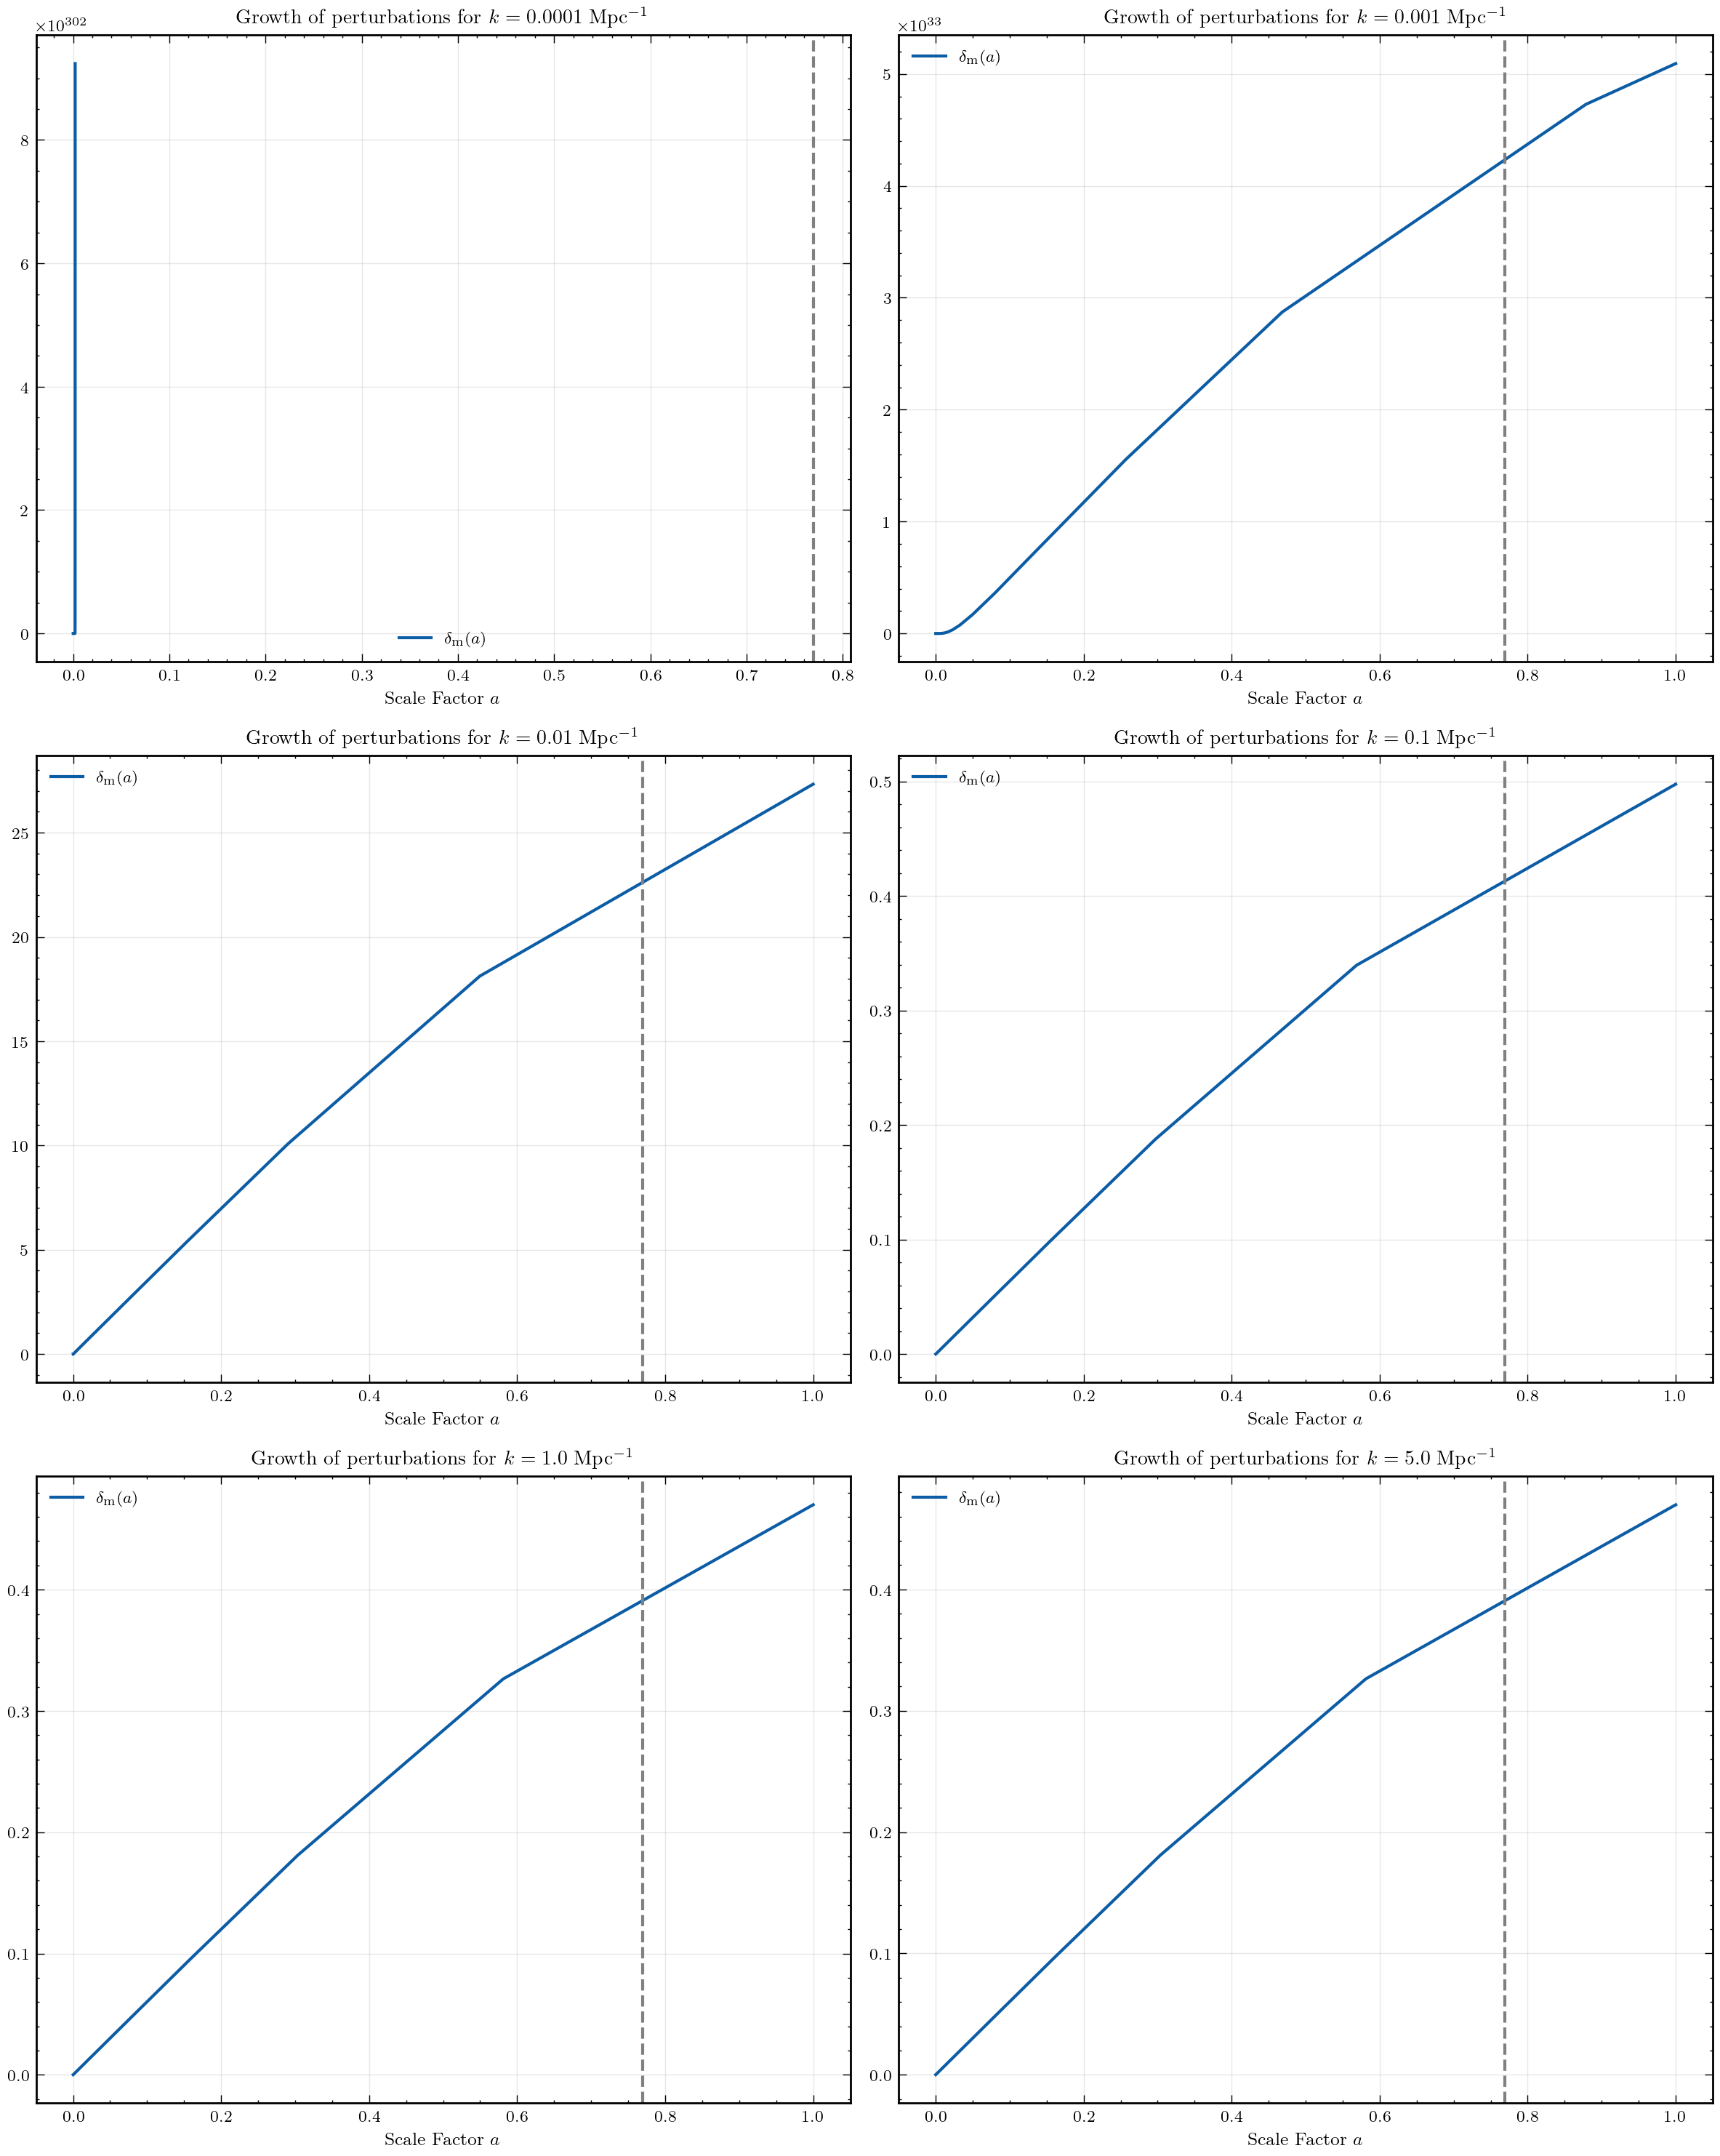

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows, 2 cols
ax = ax.flatten()  # make it a 1D array for easy indexing

for idx, k in enumerate(kk):

    # ax[idx].plot(pt[idx]['a'], delta_m[k], label='CLASS')
    ax[idx].plot(X_ivp[k].t, X_ivp[k].y[0],label=r'$\delta_\text{m}(a)$')
    
    # ax[idx].plot(a_values, a_values, label='Analytic in MDE')
    # ax[idx].plot(X_ivp[k].t, X_ivp[k].y[1],label=r'$\delta_\text{m}(a)$')
    # ax[idx].plot(X_ivp[k].t, X_ivp[k].y[2],label=r'$\delta_\text{m}(a)$')
    # ax[idx].plot(X_ivp[k].t, X_ivp[k].y[3],label=r'$\delta_\text{m}(a)$')


    ax[idx].axvline(x=1/(1+.3), color='gray', linestyle='--')

    ax[idx].set_title(f'Growth of perturbations for $k={k}$' + r' Mpc$^{-1}$')
    ax[idx].set_xlabel('Scale Factor $a$')
    ax[idx].legend()
    # ax[idx].set_xlim((0.2,1))

plt.tight_layout()
plt.show()

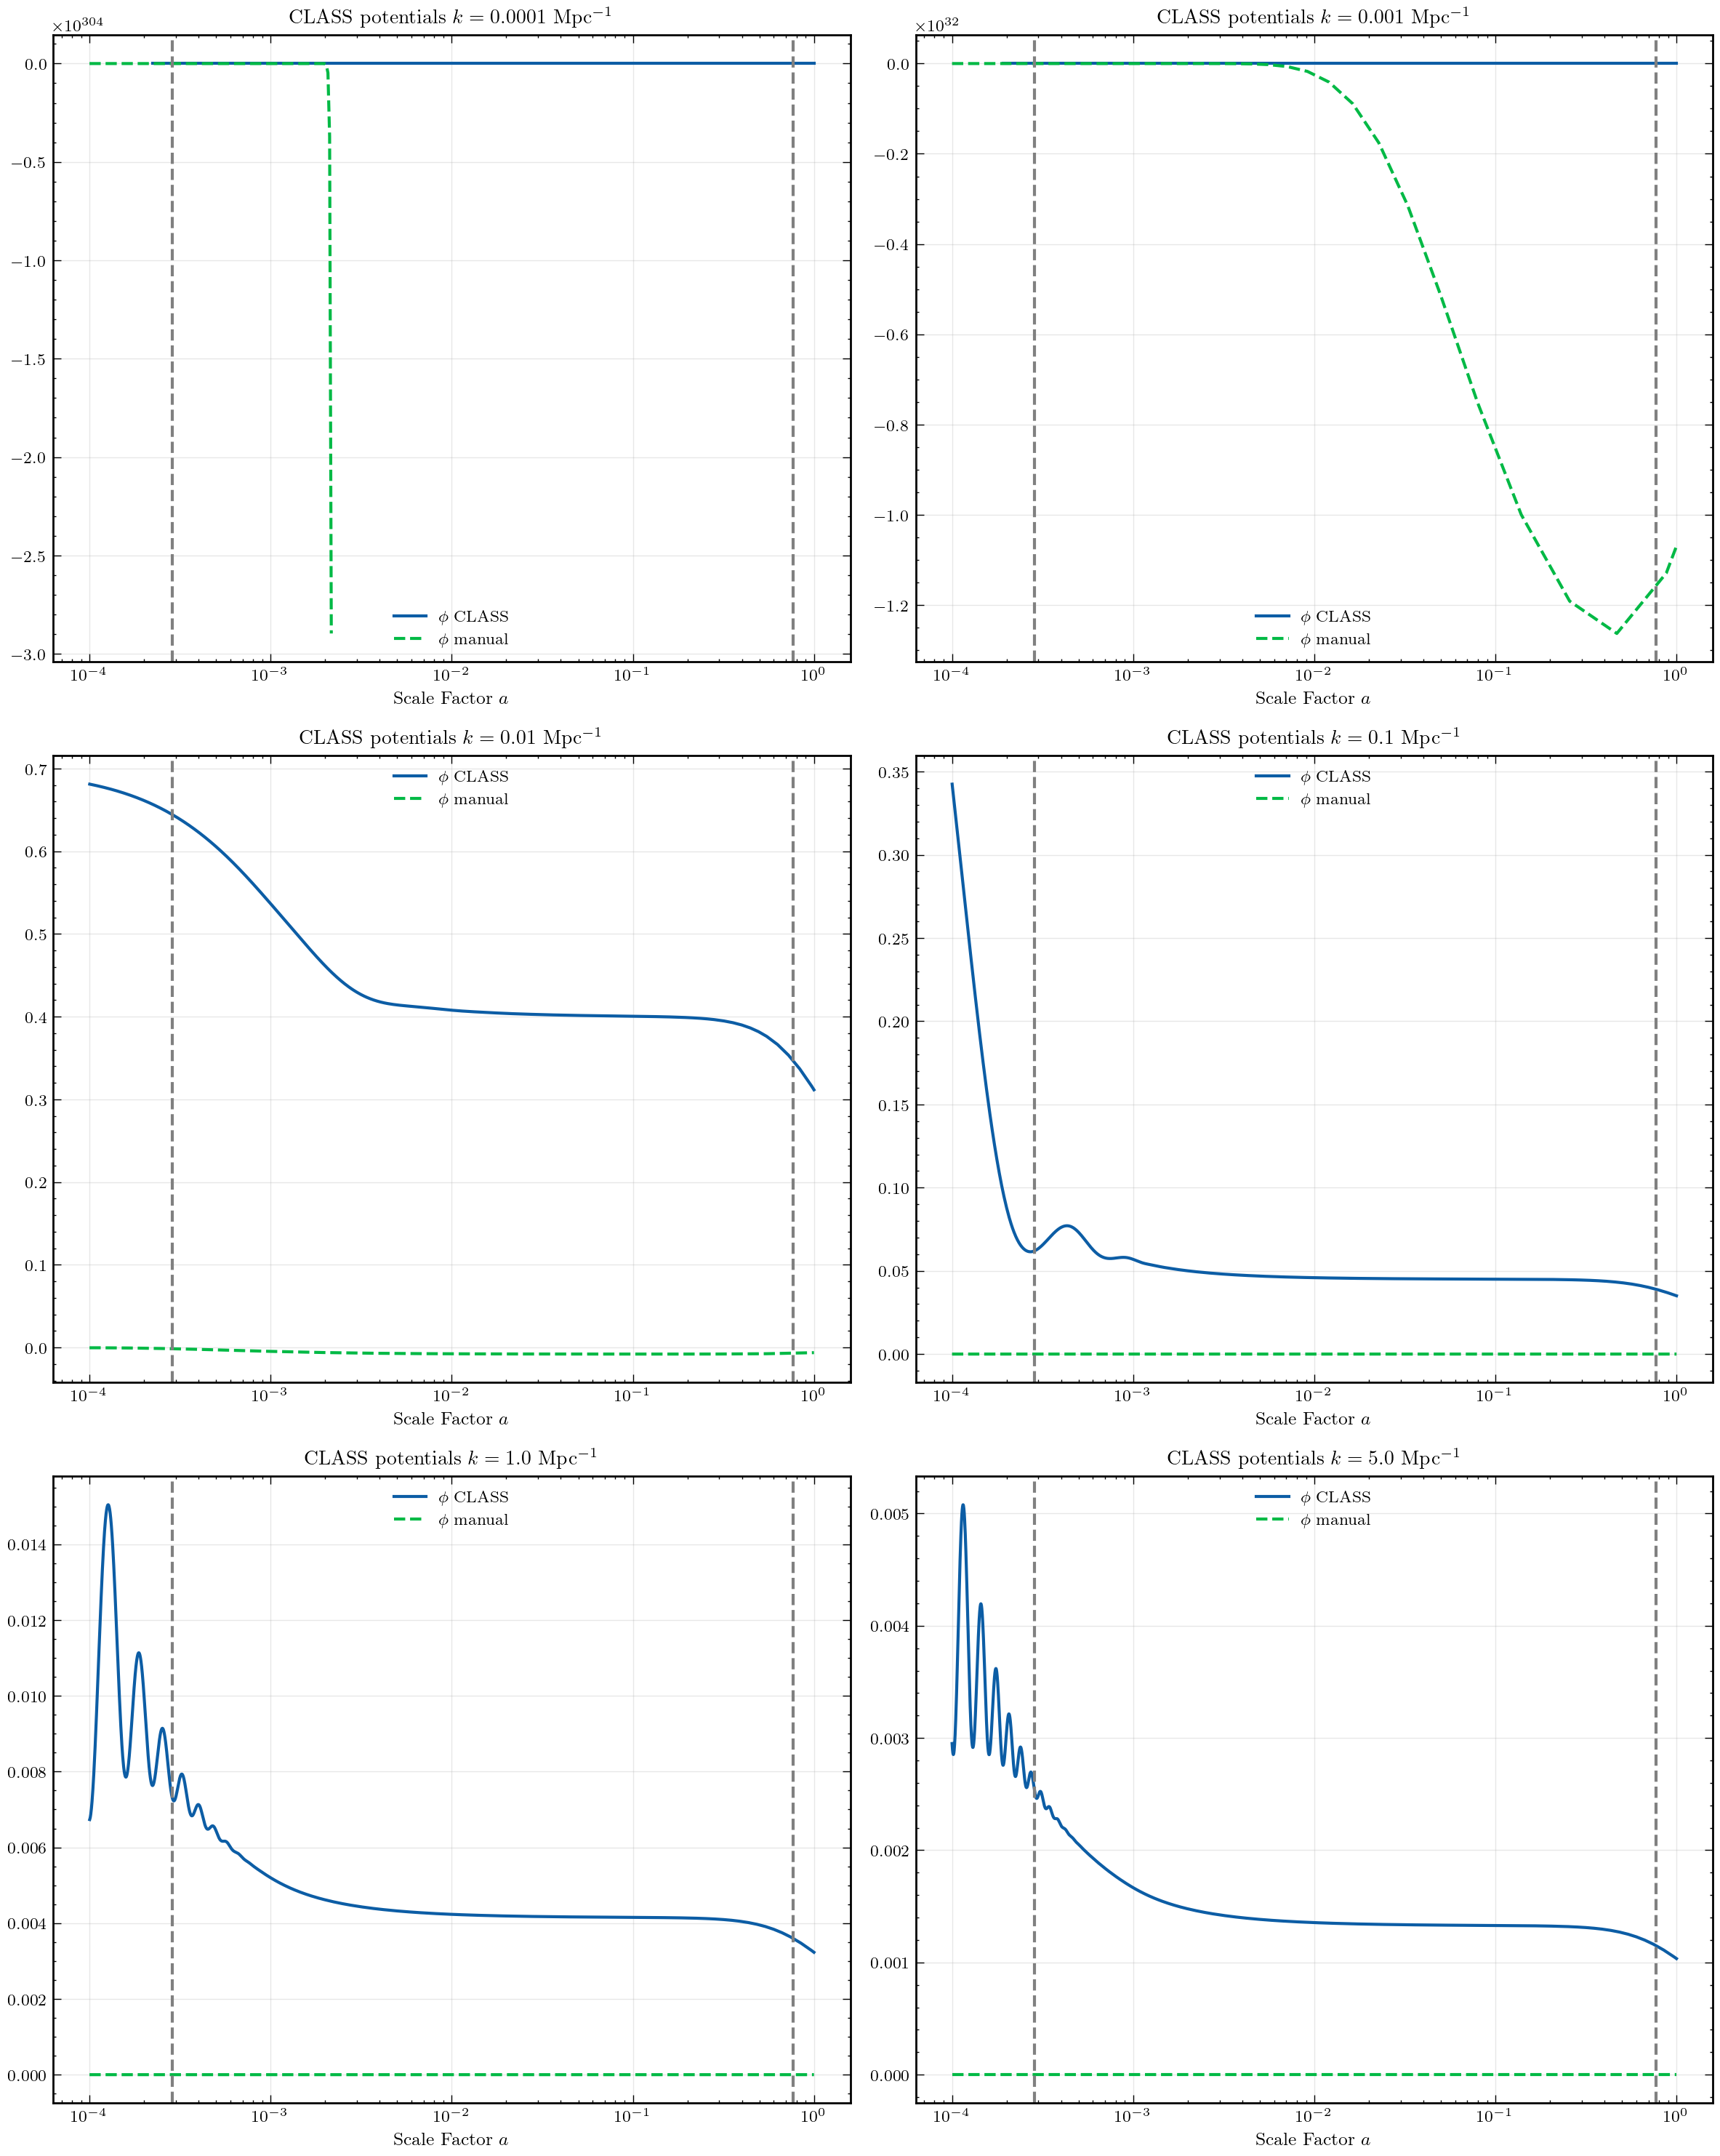

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))  # 3 rows, 2 cols
ax = ax.flatten()  # make it a 1D array for easy indexing

for idx, k in enumerate(kk):
    mask = np.where(pt[idx]['a']>=1e-4)
    ax[idx].semilogx(pt[idx]['a'][mask], phi[k][mask], label='$\phi$ CLASS')
    # ax[idx].semilogx(pt[idx]['a'], psi[k], '--', label='$\psi$')
    ax[idx].semilogx(X_ivp[k].t, vp_pt.phi(X_ivp[k].t, k, X_ivp[k].y), '--', label='$\phi$ manual ')

    ax[idx].axvline(x=1/(1+.3), color='gray', linestyle='--')
    ax[idx].axvline(x=1/(1+3500), color='gray', linestyle='--')
    ax[idx].set_title(f'CLASS potentials $k={k}$' + r' Mpc$^{-1}$')
    ax[idx].set_xlabel('Scale Factor $a$')
    ax[idx].legend()
    # ax[idx].set_xlim((1e-4,1))

plt.tight_layout()

# Comparing to CLASS

In [ ]:
cosmo = Class()

class_params = {
    'output': 'mPk',
    'k_output_values': '1e-4, 1e-3, 1e-2, 1e-1, .5, 1, 10.',
    'h': pars['h'],
    'Omega_cdm': pars['Omega_c0'],
    'Omega_b': pars['Omega_b0'],
    # 'Omega_Lambda': pars['Omega_de0'],
    'gauge':'newtonian'
    }

cosmo.set(class_params)
cosmo.compute()

bk = cosmo.get_background()
pt = cosmo.get_perturbations()['scalar']

KeyError: 'Omega_c0'

In [ ]:
idx = -1

fig, ax = plt.subplots()

a_pt = pt[idx]['a']

ax.plot(a_pt, pt[idx]['delta_g']   ,'-', label='photons')
ax.plot(a_pt, pt[idx]['delta_ur']  ,'--', label='ur')
ax.plot(a_pt, pt[idx]['delta_b']   ,'-', label='baryons')
ax.plot(a_pt, pt[idx]['delta_cdm'] ,'--', label='cdm')

ax.legend()

In [ ]:
fig, ax = plt.subplots()

ax.plot(aa, vp_pt.Omega_de(aa), label=r'$\Omega_\text{DE}$')
ax.plot(aa, vp_pt.Omega_m(aa), label=r'$\Omega_\text{m}$')
ax.plot(aa, vp_pt.Omega_de(aa) + vp_pt.Omega_m(aa), label=r'$\Omega_\text{Tot}$')
ax.plot(1/(1+bk['z']), (bk['(.)rho_cdm']+bk['(.)rho_b'])/bk['(.)rho_crit'], '--', label=r'CLASS $\Omega_\text{m}$')
ax.plot(1/(1+bk['z']), bk['(.)rho_lambda']/bk['(.)rho_crit'], '--', label=r'CLASS $\Omega_\text{DE}$')
ax.plot(1/(1+bk['z']), (bk['(.)rho_cdm']+bk['(.)rho_b']+bk['(.)rho_lambda'])/bk['(.)rho_crit'], 'k--', label=r'CLASS $\Omega_\text{Tot}$')

ax.legend()